##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Overfit and underfit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

As always, the code in this example will use the `tf.keras` API, which you can learn more about in the TensorFlow [Keras guide](https://www.tensorflow.org/guide/keras).

In both of the previous examples—[classifying text](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub) and [predicting fuel efficiency](https://www.tensorflow.org/tutorials/keras/regression) — we saw that the accuracy of our model on the validation data would peak after training for a number of epochs, and would then stagnate or start decreasing.

In other words, our model would *overfit* to the training data. Learning how to deal with overfitting is important. Although it's often possible to achieve high accuracy on the *training set*, what we really want is to develop models that generalize well to a *testing set* (or data they haven't seen before).

The opposite of overfitting is *underfitting*. Underfitting occurs when there is still room for improvement on the test data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

A model trained on more complete data will naturally generalize better. When that is no longer possible, the next best solution is to use techniques like regularization. These place constraints on the quantity and type of information your model can store.  If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

In this notebook, we'll explore several common regularization techniques, and use them to improve on a classification model.

## Setup

Before getting started, import the necessary packages:

In [3]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.1.0


In [4]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [6]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

## The Higgs Dataset

The goal of this tutorial is not to do particle physics, so don't dwell on the details of the dataset. It contains 11&#x202F;000&#x202F;000 examples, each with 28 features, and a binary class label.

In [7]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

      8192/2816407858 [..............................] - ETA: 21s

     16384/2816407858 [..............................] - ETA: 6:31:36

     49152/2816407858 [..............................] - ETA: 4:24:11

     98304/2816407858 [..............................] - ETA: 3:17:36

    212992/2816407858 [..............................] - ETA: 2:02:21

    434176/2816407858 [..............................] - ETA: 1:14:26

    860160/2816407858 [..............................] - ETA: 44:50  

   1720320/2816407858 [..............................] - ETA: 26:03

   3448832/2816407858 [..............................] - ETA: 14:48

   6586368/2816407858 [..............................] - ETA: 8:41 

   9723904/2816407858 [..............................] - ETA: 6:31

  12738560/2816407858 [..............................] - ETA: 5:09

  12869632/2816407858 [..............................] - ETA: 5:24

  15138816/2816407858 [..............................] - ETA: 4:45

  16015360/2816407858 [..............................] - ETA: 4:44

  17997824/2816407858 [..............................] - ETA: 4:20

  19152896/2816407858 [..............................] - ETA: 4:16

  20881408/2816407858 [..............................] - ETA: 4:02

  22290432/2816407858 [..............................] - ETA: 3:57

  23797760/2816407858 [..............................] - ETA: 3:48

  25427968/2816407858 [..............................] - ETA: 3:42

  26697728/2816407858 [..............................] - ETA: 3:37

  28557312/2816407858 [..............................] - ETA: 3:30

  29581312/2816407858 [..............................] - ETA: 3:28

  31703040/2816407858 [..............................] - ETA: 3:21

  32727040/2816407858 [..............................] - ETA: 3:19

  34840576/2816407858 [..............................] - ETA: 3:14

  35831808/2816407858 [..............................] - ETA: 3:12

  37978112/2816407858 [..............................] - ETA: 3:07

  38944768/2816407858 [..............................] - ETA: 3:06

  41123840/2816407858 [..............................] - ETA: 3:02

  42033152/2816407858 [..............................] - ETA: 3:01

  44269568/2816407858 [..............................] - ETA: 2:58

  45260800/2816407858 [..............................] - ETA: 2:57

  47251456/2816407858 [..............................] - ETA: 2:53

  48160768/2816407858 [..............................] - ETA: 2:53

  50397184/2816407858 [..............................] - ETA: 2:50

  51429376/2816407858 [..............................] - ETA: 2:50

  53534720/2816407858 [..............................] - ETA: 2:47

  54566912/2816407858 [..............................] - ETA: 2:47

  56680448/2816407858 [..............................] - ETA: 2:44

  57655296/2816407858 [..............................] - ETA: 2:44

  59817984/2816407858 [..............................] - ETA: 2:41

  60751872/2816407858 [..............................] - ETA: 2:42

  62955520/2816407858 [..............................] - ETA: 2:39

  63848448/2816407858 [..............................] - ETA: 2:39

  66101248/2816407858 [..............................] - ETA: 2:37

  66936832/2816407858 [..............................] - ETA: 2:37

  69246976/2816407858 [..............................] - ETA: 2:35

  70033408/2816407858 [..............................] - ETA: 2:35

  72384512/2816407858 [..............................] - ETA: 2:33

  73162752/2816407858 [..............................] - ETA: 2:33

  75530240/2816407858 [..............................] - ETA: 2:31

  76251136/2816407858 [..............................] - ETA: 2:32

  78667776/2816407858 [..............................] - ETA: 2:30

  79347712/2816407858 [..............................] - ETA: 2:30

  81813504/2816407858 [..............................] - ETA: 2:28

  82460672/2816407858 [..............................] - ETA: 2:29

  84852736/2816407858 [..............................] - ETA: 2:26

  85401600/2816407858 [..............................] - ETA: 2:27

  85860352/2816407858 [..............................] - ETA: 2:28

  88227840/2816407858 [..............................] - ETA: 2:26

  88875008/2816407858 [..............................] - ETA: 2:26

  90726400/2816407858 [..............................] - ETA: 2:25

  91627520/2816407858 [..............................] - ETA: 2:25

  92037120/2816407858 [..............................] - ETA: 2:26

  94396416/2816407858 [>.............................] - ETA: 2:24

  95035392/2816407858 [>.............................] - ETA: 2:24

  95911936/2816407858 [>.............................] - ETA: 2:24

  97845248/2816407858 [>.............................] - ETA: 2:23

  98295808/2816407858 [>.............................] - ETA: 2:24

 100655104/2816407858 [>.............................] - ETA: 2:21

 101220352/2816407858 [>.............................] - ETA: 2:22

 101695488/2816407858 [>.............................] - ETA: 2:23

 104095744/2816407858 [>.............................] - ETA: 2:21

 104562688/2816407858 [>.............................] - ETA: 2:22

 106946560/2816407858 [>.............................] - ETA: 2:20

 107593728/2816407858 [>.............................] - ETA: 2:20

 107970560/2816407858 [>.............................] - ETA: 2:21

 110460928/2816407858 [>.............................] - ETA: 2:19

 110985216/2816407858 [>.............................] - ETA: 2:20

 113549312/2816407858 [>.............................] - ETA: 2:19

 114098176/2816407858 [>.............................] - ETA: 2:19

 116629504/2816407858 [>.............................] - ETA: 2:18

 117211136/2816407858 [>.............................]

 - ETA: 2:19

 119734272/2816407858 [>.............................] - ETA: 2:17

 120324096/2816407858 [>.............................] - ETA: 2:18

 122830848/2816407858 [>.............................] - ETA: 2:16

 123412480/2816407858 [>.............................]

 - ETA: 2:17

 125960192/2816407858 [>.............................] - ETA: 2:16

 126541824/2816407858 [>.............................] - ETA: 2:16

 129097728/2816407858 [>.............................] - ETA: 2:15

 129646592/2816407858 [>.............................] - ETA: 2:16

 132235264/2816407858 [>.............................] - ETA: 2:14

 132743168/2816407858 [>.............................] - ETA: 2:15

 135372800/2816407858 [>.............................] - ETA: 2:14

 135864320/2816407858 [>.............................] - ETA: 2:15

 138518528/2816407858 [>.............................] - ETA: 2:13

 138960896/2816407858 [>.............................] - ETA: 2:14

 141459456/2816407858 [>.............................] - ETA: 2:12

 141844480/2816407858 [>.............................] - ETA: 2:13

 142565376/2816407858 [>.............................] - ETA: 2:13

 144957440/2816407858 [>.............................] - ETA: 2:13

 145702912/2816407858 [>.............................] - ETA: 2:13

 148078592/2816407858 [>.............................] - ETA: 2:12

 148815872/2816407858 [>.............................] - ETA: 2:12

 151158784/2816407858 [>.............................] - ETA: 2:11

 151412736/2816407858 [>.............................] - ETA: 2:12

 152289280/2816407858 [>.............................] - ETA: 2:12

 154320896/2816407858 [>.............................] - ETA: 2:11

 155074560/2816407858 [>.............................] - ETA: 2:11

 157409280/2816407858 [>.............................] - ETA: 2:10

 157622272/2816407858 [>.............................] - ETA: 2:11

 158334976/2816407858 [>.............................] - ETA: 2:11

 160595968/2816407858 [>.............................] - ETA: 2:10

 161333248/2816407858 [>.............................] - ETA: 2:10

 163618816/2816407858 [>.............................] - ETA: 2:09

 163823616/2816407858 [>.............................] - ETA: 2:10

 164536320/2816407858 [>.............................] - ETA: 2:10

 166879232/2816407858 [>.............................] - ETA: 2:09

 167534592/2816407858 [>.............................] - ETA: 2:09

 169058304/2816407858 [>.............................] - ETA: 2:09

 170024960/2816407858 [>.............................] - ETA: 2:09

 170795008/2816407858 [>.............................] - ETA: 2:09

 173162496/2816407858 [>.............................] - ETA: 2:08

 173891584/2816407858 [>.............................] - ETA: 2:09

 176300032/2816407858 [>.............................] - ETA: 2:08

 177029120/2816407858 [>.............................] - ETA: 2:08

 179445760/2816407858 [>.............................] - ETA: 2:08

 180158464/2816407858 [>.............................] - ETA: 2:08

 182247424/2816407858 [>.............................] - ETA: 2:07

 182976512/2816407858 [>.............................] - ETA: 2:07

 183525376/2816407858 [>.............................] - ETA: 2:08

 185729024/2816407858 [>.............................] - ETA: 2:07

 186400768/2816407858 [>.............................] - ETA: 2:07

 188448768/2816407858 [=>............................] - ETA: 2:06

 189325312/2816407858 [=>............................] - ETA: 2:06

 189792256/2816407858 [=>............................] - ETA: 2:07

 192012288/2816407858 [=>............................] - ETA: 2:06

 192651264/2816407858 [=>............................] - ETA: 2:06

 193847296/2816407858 [=>............................] - ETA: 2:06

 195534848/2816407858 [=>............................] - ETA: 2:06

 196050944/2816407858 [=>............................] - ETA: 2:06

 198295552/2816407858 [=>............................] - ETA: 2:05

 198836224/2816407858 [=>............................] - ETA: 2:06

 199417856/2816407858 [=>............................] - ETA: 2:06

 201752576/2816407858 [=>............................] - ETA: 2:05

 202268672/2816407858 [=>............................] - ETA: 2:05

 204398592/2816407858 [=>............................] - ETA: 2:04

 204906496/2816407858 [=>............................] - ETA: 2:05

 205488128/2816407858 [=>............................] - ETA: 2:05

 207847424/2816407858 [=>............................] - ETA: 2:04

 208322560/2816407858 [=>............................] - ETA: 2:04

 208846848/2816407858 [=>............................] - ETA: 2:05

 211124224/2816407858 [=>............................] - ETA: 2:04

 211730432/2816407858 [=>............................] - ETA: 2:04

 214138880/2816407858 [=>............................] - ETA: 2:04

 214654976/2816407858 [=>............................] - ETA: 2:04

 215408640/2816407858 [=>............................] - ETA: 2:04

 217284608/2816407858 [=>............................] - ETA: 2:03

 217931776/2816407858 [=>............................] - ETA: 2:04

 220405760/2816407858 [=>............................] - ETA: 2:03

 221052928/2816407858 [=>............................] - ETA: 2:03

 223182848/2816407858 [=>............................] - ETA: 2:03

 223936512/2816407858 [=>............................] - ETA: 2:03

 224395264/2816407858 [=>............................] - ETA: 2:03

 226697216/2816407858 [=>............................] - ETA: 2:03

 227336192/2816407858 [=>............................] - ETA: 2:03

 228810752/2816407858 [=>............................] - ETA: 2:02

 230170624/2816407858 [=>............................] - ETA: 2:02

 230621184/2816407858 [=>............................] - ETA: 2:02

 232980480/2816407858 [=>............................] - ETA: 2:02

 233627648/2816407858 [=>............................] - ETA: 2:02

 235167744/2816407858 [=>............................] - ETA: 2:02

 236453888/2816407858 [=>............................] - ETA: 2:02

 236953600/2816407858 [=>............................] - ETA: 2:02

 239386624/2816407858 [=>............................] - ETA: 2:01

 239902720/2816407858 [=>............................] - ETA: 2:02

 240795648/2816407858 [=>............................] - ETA: 2:02

 242679808/2816407858 [=>............................] - ETA: 2:01

 243179520/2816407858 [=>............................] - ETA: 2:01

 245596160/2816407858 [=>............................] - ETA: 2:01

 246112256/2816407858 [=>............................] - ETA: 2:01

 246562816/2816407858 [=>............................] - ETA: 2:01

 248930304/2816407858 [=>............................] - ETA: 2:01

 249446400/2816407858 [=>............................] - ETA: 2:01

 251822080/2816407858 [=>............................] - ETA: 2:00

 252338176/2816407858 [=>............................] - ETA: 2:00

 252796928/2816407858 [=>............................] - ETA: 2:01

 255139840/2816407858 [=>............................] - ETA: 2:00

 255655936/2816407858 [=>............................] - ETA: 2:00

 258097152/2816407858 [=>............................] - ETA: 2:00

 258555904/2816407858 [=>............................] - ETA: 2:00

 259006464/2816407858 [=>............................] - ETA: 2:00

 261357568/2816407858 [=>............................] - ETA: 1:59

 261881856/2816407858 [=>............................] - ETA: 2:00

 263757824/2816407858 [=>............................] - ETA: 1:59

 264806400/2816407858 [=>............................] - ETA: 1:59

 265396224/2816407858 [=>............................] - ETA: 2:00

 267640832/2816407858 [=>............................] - ETA: 1:59

 268099584/2816407858 [=>............................] - ETA: 1:59

 269254656/2816407858 [=>............................] - ETA: 1:59

 271040512/2816407858 [=>............................] - ETA: 1:59

 271622144/2816407858 [=>............................] - ETA: 1:59

 273858560/2816407858 [=>............................] - ETA: 1:58

 274350080/2816407858 [=>............................] - ETA: 1:59

 274866176/2816407858 [=>............................] - ETA: 1:59

 277282816/2816407858 [=>............................] - ETA: 1:58

 277864448/2816407858 [=>............................] - ETA: 1:58

 280141824/2816407858 [=>............................] - ETA: 1:58

 280600576/2816407858 [=>............................] - ETA: 1:58

 281092096/2816407858 [=>............................] - ETA: 1:58

 283549696/2816407858 [==>...........................] - ETA: 1:58

 284131328/2816407858 [==>...........................] - ETA: 1:58

 286228480/2816407858 [==>...........................] - ETA: 1:57

 286818304/2816407858 [==>...........................] - ETA: 1:58

 287342592/2816407858 [==>...........................] - ETA: 1:58

 289816576/2816407858 [==>...........................] - ETA: 1:57

 290299904/2816407858 [==>...........................] - ETA: 1:57

 291782656/2816407858 [==>...........................] - ETA: 1:57

 293044224/2816407858 [==>...........................] - ETA: 1:57

 293625856/2816407858 [==>...........................] - ETA: 1:57

 296050688/2816407858 [==>...........................] - ETA: 1:57

 296525824/2816407858 [==>...........................] - ETA: 1:57

 297279488/2816407858 [==>...........................] - ETA: 1:57

 299253760/2816407858 [==>...........................] - ETA: 1:57

 299835392/2816407858 [==>...........................] - ETA: 1:57

 302325760/2816407858 [==>...........................] - ETA: 1:56

 302784512/2816407858 [==>...........................] - ETA: 1:57

 303235072/2816407858 [==>...........................] - ETA: 1:57

 305537024/2816407858 [==>...........................] - ETA: 1:56

 306053120/2816407858 [==>...........................] - ETA: 1:56

 308035584/2816407858 [==>...........................] - ETA: 1:56

 308936704/2816407858 [==>...........................] - ETA: 1:56

 309395456/2816407858 [==>...........................] - ETA: 1:56

 311771136/2816407858 [==>...........................] - ETA: 1:56

 312320000/2816407858 [==>...........................] - ETA: 1:56

 313802752/2816407858 [==>...........................] - ETA: 1:56

 315211776/2816407858 [==>...........................] - ETA: 1:56

 315670528/2816407858 [==>...........................] - ETA: 1:56

 318046208/2816407858 [==>...........................] - ETA: 1:55

 318619648/2816407858 [==>...........................] - ETA: 1:56

 320503808/2816407858 [==>...........................] - ETA: 1:55

 321536000/2816407858 [==>...........................] - ETA: 1:55

 322117632/2816407858 [==>...........................] - ETA: 1:55

 324501504/2816407858 [==>...........................] - ETA: 1:55

 324952064/2816407858 [==>...........................] - ETA: 1:55

 326819840/2816407858 [==>...........................] - ETA: 1:55

 327770112/2816407858 [==>...........................] - ETA: 1:55

 328286208/2816407858 [==>...........................] - ETA: 1:55

 330661888/2816407858 [==>...........................] - ETA: 1:54

 331071488/2816407858 [==>...........................] - ETA: 1:55

 331816960/2816407858 [==>...........................] - ETA: 1:55

 333987840/2816407858 [==>...........................] - ETA: 1:54

 334503936/2816407858 [==>...........................] - ETA: 1:54

 336912384/2816407858 [==>...........................] - ETA: 1:54

 337297408/2816407858 [==>...........................] - ETA: 1:54

 337747968/2816407858 [==>...........................] - ETA: 1:54

 340172800/2816407858 [==>...........................] - ETA: 1:54

 340688896/2816407858 [==>...........................] - ETA: 1:54

 343138304/2816407858 [==>...........................] - ETA: 1:53

 343457792/2816407858 [==>...........................] - ETA: 1:54

 343982080/2816407858 [==>...........................] - ETA: 1:54

 346374144/2816407858 [==>...........................] - ETA: 1:53

 346898432/2816407858 [==>...........................] - ETA: 1:54

 348758016/2816407858 [==>...........................] - ETA: 1:53

 349667328/2816407858 [==>...........................] - ETA: 1:53

 350183424/2816407858 [==>...........................] - ETA: 1:54

 352600064/2816407858 [==>...........................] - ETA: 1:53

 353116160/2816407858 [==>...........................] - ETA: 1:53

 354279424/2816407858 [==>...........................] - ETA: 1:53

 355901440/2816407858 [==>...........................] - ETA: 1:53

 356417536/2816407858 [==>...........................] - ETA: 1:53

 358875136/2816407858 [==>...........................] - ETA: 1:53

 359538688/2816407858 [==>...........................] - ETA: 1:53

 362012672/2816407858 [==>...........................] - ETA: 1:52

 362635264/2816407858 [==>...........................] - ETA: 1:53

 365158400/2816407858 [==>...........................] - ETA: 1:52

 365731840/2816407858 [==>...........................] - ETA: 1:52

 368214016/2816407858 [==>...........................] - ETA: 1:52

 368566272/2816407858 [==>...........................] - ETA: 1:52

 369082368/2816407858 [==>...........................] - ETA: 1:52

 371400704/2816407858 [==>...........................] - ETA: 1:52

 371916800/2816407858 [==>...........................] - ETA: 1:52

 373596160/2816407858 [==>...........................] - ETA: 1:52

 374751232/2816407858 [==>...........................] - ETA: 1:52

 375267328/2816407858 [==>...........................] - ETA: 1:52

 377683968/2816407858 [===>..........................] - ETA: 1:51

 378101760/2816407858 [===>..........................] - ETA: 1:52

 379215872/2816407858 [===>..........................] - ETA: 1:52

 380952576/2816407858 [===>..........................] - ETA: 1:51

 381476864/2816407858 [===>..........................] - ETA: 1:51

 383451136/2816407858 [===>..........................] - ETA: 1:51

 384352256/2816407858 [===>..........................] - ETA: 1:51

 384876544/2816407858 [===>..........................] - ETA: 1:51

 387186688/2816407858 [===>..........................] - ETA: 1:51

 387833856/2816407858 [===>..........................] - ETA: 1:51

 390070272/2816407858 [===>..........................] - ETA: 1:51

 390586368/2816407858 [===>..........................] - ETA: 1:51

 391102464/2816407858 [===>..........................] - ETA: 1:51

 393363456/2816407858 [===>..........................] - ETA: 1:51

 394067968/2816407858 [===>..........................] - ETA: 1:51

 396091392/2816407858 [===>..........................] - ETA: 1:50

 396754944/2816407858 [===>..........................] - ETA: 1:50

 397279232/2816407858 [===>..........................] - ETA: 1:51

 399646720/2816407858 [===>..........................] - ETA: 1:50

 400228352/2816407858 [===>..........................] - ETA: 1:50

 401448960/2816407858 [===>..........................] - ETA: 1:50

 402931712/2816407858 [===>..........................] - ETA: 1:50

 403447808/2816407858 [===>..........................] - ETA: 1:50

 405929984/2816407858 [===>..........................] - ETA: 1:50

 406446080/2816407858 [===>..........................] - ETA: 1:50

 406831104/2816407858 [===>..........................] - ETA: 1:50

 409165824/2816407858 [===>..........................] - ETA: 1:50

 409681920/2816407858 [===>..........................] - ETA: 1:50

 411934720/2816407858 [===>..........................] - ETA: 1:49

 412598272/2816407858 [===>..........................] - ETA: 1:49

 412925952/2816407858 [===>..........................] - ETA: 1:50

 415416320/2816407858 [===>..........................] - ETA: 1:49

 415932416/2816407858 [===>..........................] - ETA: 1:49

 417521664/2816407858 [===>..........................] - ETA: 1:49

 418824192/2816407858 [===>..........................] - ETA: 1:49

 419078144/2816407858 [===>..........................] - ETA: 1:49

 421699584/2816407858 [===>..........................] - ETA: 1:49

 422207488/2816407858 [===>..........................] - ETA: 1:49

 424845312/2816407858 [===>..........................] - ETA: 1:49

 425295872/2816407858 [===>..........................] - ETA: 1:49

 427646976/2816407858 [===>..........................] - ETA: 1:48

 428376064/2816407858 [===>..........................] - ETA: 1:49

 428957696/2816407858 [===>..........................] - ETA: 1:49

 431325184/2816407858 [===>..........................] - ETA: 1:48

 431652864/2816407858 [===>..........................] - ETA: 1:49

 434241536/2816407858 [===>..........................] - ETA: 1:48

 434593792/2816407858 [===>..........................] - ETA: 1:48

 435183616/2816407858 [===>..........................] - ETA: 1:48

 437477376/2816407858 [===>..........................] - ETA: 1:48

 437870592/2816407858 [===>..........................] - ETA: 1:48

 439672832/2816407858 [===>..........................] - ETA: 1:48

 440811520/2816407858 [===>..........................] - ETA: 1:48

 441393152/2816407858 [===>..........................] - ETA: 1:48

 443719680/2816407858 [===>..........................] - ETA: 1:48

 444342272/2816407858 [===>..........................] - ETA: 1:48

 445710336/2816407858 [===>..........................] - ETA: 1:48

 447037440/2816407858 [===>..........................] - ETA: 1:48

 447619072/2816407858 [===>..........................] - ETA: 1:48

 449986560/2816407858 [===>..........................] - ETA: 1:47

 450568192/2816407858 [===>..........................] - ETA: 1:47

 451690496/2816407858 [===>..........................] - ETA: 1:47

 453271552/2816407858 [===>..........................] - ETA: 1:47

 453926912/2816407858 [===>..........................] - ETA: 1:47

 456261632/2816407858 [===>..........................] - ETA: 1:47

 456933376/2816407858 [===>..........................] - ETA: 1:47

 459407360/2816407858 [===>..........................] - ETA: 1:47

 460046336/2816407858 [===>..........................] - ETA: 1:47

 462544896/2816407858 [===>..........................] - ETA: 1:47

 463142912/2816407858 [===>..........................] - ETA: 1:47

 465649664/2816407858 [===>..........................] - ETA: 1:46

 465993728/2816407858 [===>..........................] - ETA: 1:46

 466608128/2816407858 [===>..........................] - ETA: 1:47

 468811776/2816407858 [===>..........................] - ETA: 1:46

 469426176/2816407858 [====>.........................] - ETA: 1:46

 471949312/2816407858 [====>.........................] - ETA: 1:46

 472571904/2816407858 [====>.........................] - ETA: 1:46

 475013120/2816407858 [====>.........................] - ETA: 1:46

 475561984/2816407858 [====>.........................] - ETA: 1:46

 476020736/2816407858 [====>.........................] - ETA: 1:46

 478216192/2816407858 [====>.........................] - ETA: 1:46

 478806016/2816407858 [====>.........................] - ETA: 1:46

 480444416/2816407858 [====>.........................] - ETA: 1:46

 481746944/2816407858 [====>.........................] - ETA: 1:46

 482254848/2816407858 [====>.........................] - ETA: 1:46

 484499456/2816407858 [====>.........................] - ETA: 1:45

 485302272/2816407858 [====>.........................] - ETA: 1:45

 487153664/2816407858 [====>.........................] - ETA: 1:45

 488087552/2816407858 [====>.........................] - ETA: 1:45

 488603648/2816407858 [====>.........................] - ETA: 1:45

 490840064/2816407858 [====>.........................] - ETA: 1:45

 491495424/2816407858 [====>.........................] - ETA: 1:45

 492773376/2816407858 [====>.........................] - ETA: 1:45

 494362624/2816407858 [====>.........................] - ETA: 1:45

 494878720/2816407858 [====>.........................] - ETA: 1:45

 497139712/2816407858 [====>.........................] - ETA: 1:45

 497770496/2816407858 [====>.........................] - ETA: 1:45

 498909184/2816407858 [====>.........................] - ETA: 1:45

 500604928/2816407858 [====>.........................] - ETA: 1:45

 501121024/2816407858 [====>.........................] - ETA: 1:45

 503693312/2816407858 [====>.........................] - ETA: 1:44

 504209408/2816407858 [====>.........................] - ETA: 1:45

 506814464/2816407858 [====>.........................] - ETA: 1:44

 507330560/2816407858 [====>.........................] - ETA: 1:44

 509943808/2816407858 [====>.........................] - ETA: 1:44

 510459904/2816407858 [====>.........................] - ETA: 1:44

 513015808/2816407858 [====>.........................] - ETA: 1:44

 513597440/2816407858 [====>.........................] - ETA: 1:44

 516104192/2816407858 [====>.........................] - ETA: 1:44

 516685824/2816407858 [====>.........................] - ETA: 1:44

 519225344/2816407858 [====>.........................] - ETA: 1:44

 519806976/2816407858 [====>.........................] - ETA: 1:44

 522371072/2816407858 [====>.........................] - ETA: 1:43

 522952704/2816407858 [====>.........................] - ETA: 1:44

 525508608/2816407858 [====>.........................] - ETA: 1:43

 526065664/2816407858 [====>.........................] - ETA: 1:43

 528646144/2816407858 [====>.........................] - ETA: 1:43

 529154048/2816407858 [====>.........................] - ETA: 1:43

 531644416/2816407858 [====>.........................] - ETA: 1:43

 532054016/2816407858 [====>.........................] - ETA: 1:43

 532652032/2816407858 [====>.........................] - ETA: 1:43

 534937600/2816407858 [====>.........................] - ETA: 1:43

 535535616/2816407858 [====>.........................] - ETA: 1:43

 537763840/2816407858 [====>.........................] - ETA: 1:42

 538329088/2816407858 [====>.........................] - ETA: 1:43

 538918912/2816407858 [====>.........................] - ETA: 1:43

 541220864/2816407858 [====>.........................] - ETA: 1:42

 541736960/2816407858 [====>.........................] - ETA: 1:43

 543629312/2816407858 [====>.........................] - ETA: 1:42

 544686080/2816407858 [====>.........................] - ETA: 1:42

 545718272/2816407858 [====>.........................] - ETA: 1:42

 547627008/2816407858 [====>.........................] - ETA: 1:42

 548274176/2816407858 [====>.........................] - ETA: 1:42

 550461440/2816407858 [====>.........................] - ETA: 1:42

 550944768/2816407858 [====>.........................] - ETA: 1:42

 551591936/2816407858 [====>.........................] - ETA: 1:42

 553844736/2816407858 [====>.........................] - ETA: 1:42

 554475520/2816407858 [====>.........................] - ETA: 1:42

 556064768/2816407858 [====>.........................] - ETA: 1:42

 557154304/2816407858 [====>.........................] - ETA: 1:42

 557801472/2816407858 [====>.........................] - ETA: 1:42

 560078848/2816407858 [====>.........................] - ETA: 1:41

 560668672/2816407858 [====>.........................] - ETA: 1:41

 561569792/2816407858 [====>.........................] - ETA: 1:41

 563372032/2816407858 [=====>........................] - ETA: 1:41

 564019200/2816407858 [=====>........................] - ETA: 1:41

 566345728/2816407858 [=====>........................] - ETA: 1:41

 566902784/2816407858 [=====>........................] - ETA: 1:41

 567828480/2816407858 [=====>........................] - ETA: 1:41

 569524224/2816407858 [=====>........................] - ETA: 1:41

 570171392/2816407858 [=====>........................] - ETA: 1:41

 572628992/2816407858 [=====>........................] - ETA: 1:41

 573267968/2816407858 [=====>........................] - ETA: 1:41

 575766528/2816407858 [=====>........................] - ETA: 1:41

 576413696/2816407858 [=====>........................] - ETA: 1:41

 578904064/2816407858 [=====>........................] - ETA: 1:40

 579543040/2816407858 [=====>........................] - ETA: 1:41

 582049792/2816407858 [=====>........................] - ETA: 1:40

 582680576/2816407858 [=====>........................] - ETA: 1:40

 584794112/2816407858 [=====>........................] - ETA: 1:40

 585572352/2816407858 [=====>........................] - ETA: 1:40

 586113024/2816407858 [=====>........................] - ETA: 1:40

 588333056/2816407858 [=====>........................] - ETA: 1:40

 589168640/2816407858 [=====>........................] - ETA: 1:40

 591470592/2816407858 [=====>........................] - ETA: 1:40

 591986688/2816407858 [=====>........................] - ETA: 1:40

 593182720/2816407858 [=====>........................] - ETA: 1:40

 594911232/2816407858 [=====>........................] - ETA: 1:40

 595435520/2816407858 [=====>........................] - ETA: 1:40

 597745664/2816407858 [=====>........................] - ETA: 1:39

 598441984/2816407858 [=====>........................] - ETA: 1:40

 600293376/2816407858 [=====>........................] - ETA: 1:39

 601292800/2816407858 [=====>........................] - ETA: 1:39

 601882624/2816407858 [=====>........................] - ETA: 1:39

 604315648/2816407858 [=====>........................] - ETA: 1:39

 604708864/2816407858 [=====>........................] - ETA: 1:39

 606363648/2816407858 [=====>........................] - ETA: 1:39

 607543296/2816407858 [=====>........................] - ETA: 1:39

 608133120/2816407858 [=====>........................] - ETA: 1:39

 610615296/2816407858 [=====>........................] - ETA: 1:39

 610959360/2816407858 [=====>........................] - ETA: 1:39

 612229120/2816407858 [=====>........................] - ETA: 1:39

 613769216/2816407858 [=====>........................] - ETA: 1:39

 614375424/2816407858 [=====>........................] - ETA: 1:39

 616865792/2816407858 [=====>........................] - ETA: 1:39

 617504768/2816407858 [=====>........................] - ETA: 1:39

 620003328/2816407858 [=====>........................] - ETA: 1:38

 620634112/2816407858 [=====>........................] - ETA: 1:38

 623140864/2816407858 [=====>........................] - ETA: 1:38

 623747072/2816407858 [=====>........................] - ETA: 1:38

 626278400/2816407858 [=====>........................] - ETA: 1:38

 626876416/2816407858 [=====>........................] - ETA: 1:38

 629424128/2816407858 [=====>........................] - ETA: 1:38

 630005760/2816407858 [=====>........................] - ETA: 1:38

 632561664/2816407858 [=====>........................] - ETA: 1:38

 633102336/2816407858 [=====>........................] - ETA: 1:38

 635707392/2816407858 [=====>........................] - ETA: 1:38

 636198912/2816407858 [=====>........................] - ETA: 1:38

 638771200/2816407858 [=====>........................] - ETA: 1:37

 639107072/2816407858 [=====>........................] - ETA: 1:37

 639713280/2816407858 [=====>........................] - ETA: 1:38

 641998848/2816407858 [=====>........................] - ETA: 1:37

 642424832/2816407858 [=====>........................] - ETA: 1:37

 644358144/2816407858 [=====>........................] - ETA: 1:37

 645316608/2816407858 [=====>........................] - ETA: 1:37

 645898240/2816407858 [=====>........................] - ETA: 1:37

 648282112/2816407858 [=====>........................] - ETA: 1:37

 648978432/2816407858 [=====>........................] - ETA: 1:37

 651411456/2816407858 [=====>........................] - ETA: 1:37

 652083200/2816407858 [=====>........................] - ETA: 1:37

 654548992/2816407858 [=====>........................] - ETA: 1:37

 655196160/2816407858 [=====>........................] - ETA: 1:37

 657637376/2816407858 [======>.......................] - ETA: 1:36

 658014208/2816407858 [======>.......................] - ETA: 1:37

 658661376/2816407858 [======>.......................] - ETA: 1:37

 660996096/2816407858 [======>.......................] - ETA: 1:36

 661487616/2816407858 [======>.......................] - ETA: 1:36

 662904832/2816407858 [======>.......................] - ETA: 1:36

 664223744/2816407858 [======>.......................] - ETA: 1:36

 664739840/2816407858 [======>.......................] - ETA: 1:36

 667361280/2816407858 [======>.......................] - ETA: 1:36

 667811840/2816407858 [======>.......................] - ETA: 1:36

 670449664/2816407858 [======>.......................] - ETA: 1:36

 670908416/2816407858 [======>.......................] - ETA: 1:36

 673562624/2816407858 [======>.......................] - ETA: 1:36

 674013184/2816407858 [======>.......................] - ETA: 1:36

 676708352/2816407858 [======>.......................] - ETA: 1:36

 677093376/2816407858 [======>.......................] - ETA: 1:36

 679813120/2816407858 [======>.......................] - ETA: 1:35

 680206336/2816407858 [======>.......................] - ETA: 1:36

 682950656/2816407858 [======>.......................] - ETA: 1:35

 683294720/2816407858 [======>.......................] - ETA: 1:35

 686088192/2816407858 [======>.......................] - ETA: 1:35

 686415872/2816407858 [======>.......................] - ETA: 1:35

 688799744/2816407858 [======>.......................] - ETA: 1:35

 689512448/2816407858 [======>.......................] - ETA: 1:35

 691560448/2816407858 [======>.......................] - ETA: 1:35

 692617216/2816407858 [======>.......................] - ETA: 1:35

 694370304/2816407858 [======>.......................] - ETA: 1:35

 695697408/2816407858 [======>.......................] - ETA: 1:35

 697147392/2816407858 [======>.......................] - ETA: 1:35

 698802176/2816407858 [======>.......................] - ETA: 1:35

 699858944/2816407858 [======>.......................] - ETA: 1:35

 701939712/2816407858 [======>.......................] - ETA: 1:34

 702824448/2816407858 [======>.......................] - ETA: 1:34

 705077248/2816407858 [======>.......................] - ETA: 1:34

 705855488/2816407858 [======>.......................] - ETA: 1:34

 708206592/2816407858 [======>.......................] - ETA: 1:34

 708984832/2816407858 [======>.......................] - ETA: 1:34

 711303168/2816407858 [======>.......................] - ETA: 1:34

 712081408/2816407858 [======>.......................] - ETA: 1:34

 714424320/2816407858 [======>.......................] - ETA: 1:34

 715202560/2816407858 [======>.......................] - ETA: 1:34

 717553664/2816407858 [======>.......................] - ETA: 1:34

 718331904/2816407858 [======>.......................] - ETA: 1:34

 720658432/2816407858 [======>.......................] - ETA: 1:33

 721420288/2816407858 [======>.......................] - ETA: 1:33

 723804160/2816407858 [======>.......................] - ETA: 1:33

 724516864/2816407858 [======>.......................] - ETA: 1:33

 726949888/2816407858 [======>.......................] - ETA: 1:33

 727662592/2816407858 [======>.......................] - ETA: 1:33

 730087424/2816407858 [======>.......................] - ETA: 1:33

 730783744/2816407858 [======>.......................] - ETA: 1:33

 731070464/2816407858 [======>.......................] - ETA: 1:33

 734199808/2816407858 [======>.......................] - ETA: 1:33

 734748672/2816407858 [======>.......................] - ETA: 1:33

 736616448/2816407858 [======>.......................] - ETA: 1:33

 737894400/2816407858 [======>.......................] - ETA: 1:33

 739532800/2816407858 [======>.......................] - ETA: 1:33

 740941824/2816407858 [======>.......................] - ETA: 1:33

 743489536/2816407858 [======>.......................] - ETA: 1:33

 743956480/2816407858 [======>.......................] - ETA: 1:33

 746741760/2816407858 [======>.......................] - ETA: 1:32

 747044864/2816407858 [======>.......................] - ETA: 1:33

 749846528/2816407858 [======>.......................] - ETA: 1:32

 750141440/2816407858 [======>.......................] - ETA: 1:32

 752951296/2816407858 [=======>......................] - ETA: 1:32

 753246208/2816407858 [=======>......................] - ETA: 1:32

 756039680/2816407858 [=======>......................] - ETA: 1:32

 756342784/2816407858 [=======>......................] - ETA: 1:32

 759119872/2816407858 [=======>......................] - ETA: 1:32

 759488512/2816407858 [=======>......................] - ETA: 1:32

 762257408/2816407858 [=======>......................] - ETA: 1:32

 762585088/2816407858 [=======>......................] - ETA: 1:32

 765378560/2816407858 [=======>......................] - ETA: 1:31

 765706240/2816407858 [=======>......................] - ETA: 1:32

 768507904/2816407858 [=======>......................] - ETA: 1:31

 768835584/2816407858 [=======>......................] - ETA: 1:31

 771620864/2816407858 [=======>......................] - ETA: 1:31

 771940352/2816407858 [=======>......................] - ETA: 1:31

 774578176/2816407858 [=======>......................] - ETA: 1:31

 775045120/2816407858 [=======>......................] - ETA: 1:31

 777150464/2816407858 [=======>......................] - ETA: 1:31

 778190848/2816407858 [=======>......................] - ETA: 1:31

 779788288/2816407858 [=======>......................] - ETA: 1:31

 781328384/2816407858 [=======>......................] - ETA: 1:31

 782606336/2816407858 [=======>......................] - ETA: 1:31

 784465920/2816407858 [=======>......................] - ETA: 1:31

 786063360/2816407858 [=======>......................] - ETA: 1:31

 787603456/2816407858 [=======>......................] - ETA: 1:31

 789356544/2816407858 [=======>......................] - ETA: 1:30

 790749184/2816407858 [=======>......................] - ETA: 1:30

 792207360/2816407858 [=======>......................] - ETA: 1:30

 793886720/2816407858 [=======>......................] - ETA: 1:30

 795541504/2816407858 [=======>......................] - ETA: 1:30

 797007872/2816407858 [=======>......................] - ETA: 1:30

 798220288/2816407858 [=======>......................] - ETA: 1:30

 800153600/2816407858 [=======>......................] - ETA: 1:30

 801169408/2816407858 [=======>......................] - ETA: 1:30

 803291136/2816407858 [=======>......................] - ETA: 1:30

 804282368/2816407858 [=======>......................] - ETA: 1:30

 806428672/2816407858 [=======>......................] - ETA: 1:30

 807403520/2816407858 [=======>......................] - ETA: 1:30

 809566208/2816407858 [=======>......................] - ETA: 1:29

 810516480/2816407858 [=======>......................] - ETA: 1:29

 812711936/2816407858 [=======>......................] - ETA: 1:29

 813645824/2816407858 [=======>......................] - ETA: 1:29

 815849472/2816407858 [=======>......................] - ETA: 1:29

 816758784/2816407858 [=======>......................] - ETA: 1:29

 818995200/2816407858 [=======>......................] - ETA: 1:29

 819912704/2816407858 [=======>......................] - ETA: 1:29

 822124544/2816407858 [=======>......................] - ETA: 1:29

 823017472/2816407858 [=======>......................] - ETA: 1:29

 825270272/2816407858 [=======>......................] - ETA: 1:29

 826122240/2816407858 [=======>......................] - ETA: 1:29

 828407808/2816407858 [=======>......................] - ETA: 1:29

 829202432/2816407858 [=======>......................] - ETA: 1:29

 831545344/2816407858 [=======>......................] - ETA: 1:28

 832339968/2816407858 [=======>......................] - ETA: 1:28

 834691072/2816407858 [=======>......................] - ETA: 1:28

 835469312/2816407858 [=======>......................] - ETA: 1:28

 837828608/2816407858 [=======>......................] - ETA: 1:28

 838574080/2816407858 [=======>......................] - ETA: 1:28

 840966144/2816407858 [=======>......................] - ETA: 1:28

 841670656/2816407858 [=======>......................] - ETA: 1:28

 844103680/2816407858 [=======>......................] - ETA: 1:28

 844775424/2816407858 [=======>......................] - ETA: 1:28

 847249408/2816407858 [========>.....................] - ETA: 1:28

 847904768/2816407858 [========>.....................] - ETA: 1:28

 850116608/2816407858 [========>.....................] - ETA: 1:27

 850829312/2816407858 [========>.....................] - ETA: 1:27

 851369984/2816407858 [========>.....................] - ETA: 1:27

 853663744/2816407858 [========>.....................] - ETA: 1:27

 854319104/2816407858 [========>.....................] - ETA: 1:27

 856678400/2816407858 [========>.....................] - ETA: 1:27

 857260032/2816407858 [========>.....................] - ETA: 1:27

 858775552/2816407858 [========>.....................] - ETA: 1:27

 860143616/2816407858 [========>.....................] - ETA: 1:27

 860659712/2816407858 [========>.....................] - ETA: 1:27

 863027200/2816407858 [========>.....................] - ETA: 1:27

 863674368/2816407858 [========>.....................] - ETA: 1:27

 864985088/2816407858 [========>.....................] - ETA: 1:27

 866361344/2816407858 [========>.....................] - ETA: 1:27

 866885632/2816407858 [========>.....................] - ETA: 1:27

 869253120/2816407858 [========>.....................] - ETA: 1:27

 869892096/2816407858 [========>.....................] - ETA: 1:27

 870522880/2816407858 [========>.....................] - ETA: 1:27

 872644608/2816407858 [========>.....................] - ETA: 1:26

 873046016/2816407858 [========>.....................] - ETA: 1:26

 875257856/2816407858 [========>.....................] - ETA: 1:26

 875896832/2816407858 [========>.....................] - ETA: 1:26

 878419968/2816407858 [========>.....................] - ETA: 1:26

 878977024/2816407858 [========>.....................] - ETA: 1:26

 881532928/2816407858 [========>.....................] - ETA: 1:26

 882098176/2816407858 [========>.....................] - ETA: 1:26

 884662272/2816407858 [========>.....................] - ETA: 1:26

 885243904/2816407858 [========>.....................] - ETA: 1:26

 887783424/2816407858 [========>.....................] - ETA: 1:26

 888373248/2816407858 [========>.....................] - ETA: 1:26

 890642432/2816407858 [========>.....................] - ETA: 1:26

 891478016/2816407858 [========>.....................] - ETA: 1:26

 893460480/2816407858 [========>.....................] - ETA: 1:25

 894574592/2816407858 [========>.....................] - ETA: 1:25

 896163840/2816407858 [========>.....................] - ETA: 1:25

 897679360/2816407858 [========>.....................] - ETA: 1:25

 898859008/2816407858 [========>.....................] - ETA: 1:25

 900808704/2816407858 [========>.....................] - ETA: 1:25

 901840896/2816407858 [========>.....................] - ETA: 1:25

 903946240/2816407858 [========>.....................] - ETA: 1:25

 904912896/2816407858 [========>.....................] - ETA: 1:25

 907091968/2816407858 [========>.....................] - ETA: 1:25

 908066816/2816407858 [========>.....................] - ETA: 1:25

 910229504/2816407858 [========>.....................] - ETA: 1:25

 911204352/2816407858 [========>.....................] - ETA: 1:25

 913375232/2816407858 [========>.....................] - ETA: 1:25

 914341888/2816407858 [========>.....................] - ETA: 1:25

 916520960/2816407858 [========>.....................] - ETA: 1:24

 917487616/2816407858 [========>.....................] - ETA: 1:24

 919666688/2816407858 [========>.....................] - ETA: 1:24

 920576000/2816407858 [========>.....................] - ETA: 1:24

 922796032/2816407858 [========>.....................] - ETA: 1:24

 923672576/2816407858 [========>.....................] - ETA: 1:24

 925941760/2816407858 [========>.....................] - ETA: 1:24

 926785536/2816407858 [========>.....................] - ETA: 1:24

 929087488/2816407858 [========>.....................] - ETA: 1:24

 930119680/2816407858 [========>.....................] - ETA: 1:24

 932225024/2816407858 [========>.....................] - ETA: 1:24

 933216256/2816407858 [========>.....................] - ETA: 1:24

 935370752/2816407858 [========>.....................] - ETA: 1:23

 936280064/2816407858 [========>.....................] - ETA: 1:23

 938508288/2816407858 [========>.....................] - ETA: 1:23

 939384832/2816407858 [=========>....................] - ETA: 1:23

 941654016/2816407858 [=========>....................] - ETA: 1:23

 942514176/2816407858 [=========>....................] - ETA: 1:23

 944791552/2816407858 [=========>....................] - ETA: 1:23

 945643520/2816407858 [=========>....................] - ETA: 1:23

 947937280/2816407858 [=========>....................] - ETA: 1:23

 948723712/2816407858 [=========>....................] - ETA: 1:23

 951074816/2816407858 [=========>....................] - ETA: 1:23

 951853056/2816407858 [=========>....................] - ETA: 1:23

 954179584/2816407858 [=========>....................] - ETA: 1:23

 954957824/2816407858 [=========>....................] - ETA: 1:23

 957325312/2816407858 [=========>....................] - ETA: 1:22

 958103552/2816407858 [=========>....................] - ETA: 1:22

 960454656/2816407858 [=========>....................] - ETA: 1:22

 961175552/2816407858 [=========>....................] - ETA: 1:22

 963600384/2816407858 [=========>....................] - ETA: 1:22

 964272128/2816407858 [=========>....................] - ETA: 1:22

 966705152/2816407858 [=========>....................] - ETA: 1:22

 967155712/2816407858 [=========>....................] - ETA: 1:22

 967729152/2816407858 [=========>....................] - ETA: 1:22

 969867264/2816407858 [=========>....................] - ETA: 1:22

 970489856/2816407858 [=========>....................] - ETA: 1:22

 973004800/2816407858 [=========>....................] - ETA: 1:22

 973586432/2816407858 [=========>....................] - ETA: 1:22

 976150528/2816407858 [=========>....................] - ETA: 1:22

 976699392/2816407858 [=========>....................] - ETA: 1:22

 979296256/2816407858 [=========>....................] - ETA: 1:21

 979812352/2816407858 [=========>....................] - ETA: 1:21

 982417408/2816407858 [=========>....................] - ETA: 1:21

 982941696/2816407858 [=========>....................] - ETA: 1:21

 985194496/2816407858 [=========>....................] - ETA: 1:21

 986030080/2816407858 [=========>....................] - ETA: 1:21

 987971584/2816407858 [=========>....................] - ETA: 1:21

 989151232/2816407858 [=========>....................] - ETA: 1:21

 990740480/2816407858 [=========>....................] - ETA: 1:21

 992272384/2816407858 [=========>....................] - ETA: 1:21

 993550336/2816407858 [=========>....................] - ETA: 1:21

 995377152/2816407858 [=========>....................] - ETA: 1:21

 996253696/2816407858 [=========>....................] - ETA: 1:21

 998506496/2816407858 [=========>....................] - ETA: 1:21

 999219200/2816407858 [=========>....................] - ETA: 1:21

1001586688/2816407858 [=========>....................] - ETA: 1:20

1002323968/2816407858 [=========>....................] - ETA: 1:20

1004683264/2816407858 [=========>....................] - ETA: 1:20

1005395968/2816407858 [=========>....................] - ETA: 1:20

1007820800/2816407858 [=========>....................] - ETA: 1:20

1008533504/2816407858 [=========>....................] - ETA: 1:20

1010966528/2816407858 [=========>....................] - ETA: 1:20

1011679232/2816407858 [=========>....................] - ETA: 1:20

1014095872/2816407858 [=========>....................] - ETA: 1:20

1014808576/2816407858 [=========>....................] - ETA: 1:20

1017192448/2816407858 [=========>....................] - ETA: 1:20

1017905152/2816407858 [=========>....................] - ETA: 1:20

1020329984/2816407858 [=========>....................] - ETA: 1:20

1021001728/2816407858 [=========>....................] - ETA: 1:20

1023475712/2816407858 [=========>....................] - ETA: 1:19

1024106496/2816407858 [=========>....................] - ETA: 1:19

1026613248/2816407858 [=========>....................] - ETA: 1:19

1027219456/2816407858 [=========>....................] - ETA: 1:19

1029545984/2816407858 [=========>....................] - ETA: 1:19

1029980160/2816407858 [=========>....................] - ETA: 1:19

1030684672/2816407858 [=========>....................] - ETA: 1:19

1032888320/2816407858 [==========>...................] - ETA: 1:19

1033453568/2816407858 [==========>...................] - ETA: 1:19

1035665408/2816407858 [==========>...................] - ETA: 1:19

1036296192/2816407858 [==========>...................] - ETA: 1:19

1036877824/2816407858 [==========>...................] - ETA: 1:19

1039171584/2816407858 [==========>...................] - ETA: 1:19

1039646720/2816407858 [==========>...................] - ETA: 1:19

1041375232/2816407858 [==========>...................] - ETA: 1:19

1042464768/2816407858 [==========>...................] - ETA: 1:18

1043046400/2816407858 [==========>...................] - ETA: 1:18

1045454848/2816407858 [==========>...................] - ETA: 1:18

1045872640/2816407858 [==========>...................] - ETA: 1:18

1046888448/2816407858 [==========>...................] - ETA: 1:18

1048698880/2816407858 [==========>...................] - ETA: 1:18

1049288704/2816407858 [==========>...................] - ETA: 1:18

1051738112/2816407858 [==========>...................] - ETA: 1:18

1052377088/2816407858 [==========>...................] - ETA: 1:18

1054687232/2816407858 [==========>...................] - ETA: 1:18

1055145984/2816407858 [==========>...................] - ETA: 1:18

1055817728/2816407858 [==========>...................] - ETA: 1:18

1058021376/2816407858 [==========>...................] - ETA: 1:18

1058603008/2816407858 [==========>...................] - ETA: 1:18

1060241408/2816407858 [==========>...................] - ETA: 1:18

1061404672/2816407858 [==========>...................] - ETA: 1:18

1062076416/2816407858 [==========>...................] - ETA: 1:18

1064296448/2816407858 [==========>...................] - ETA: 1:17

1064878080/2816407858 [==========>...................] - ETA: 1:17

1066082304/2816407858 [==========>...................] - ETA: 1:17

1067573248/2816407858 [==========>...................] - ETA: 1:17

1068351488/2816407858 [==========>...................] - ETA: 1:17

1070587904/2816407858 [==========>...................] - ETA: 1:17

1071112192/2816407858 [==========>...................] - ETA: 1:17

1071677440/2816407858 [==========>...................] - ETA: 1:17

1073725440/2816407858 [==========>...................] - ETA: 1:17

1074544640/2816407858 [==========>...................] - ETA: 1:17

1076862976/2816407858 [==========>...................] - ETA: 1:17

1077690368/2816407858 [==========>...................] - ETA: 1:17

1080000512/2816407858 [==========>...................] - ETA: 1:17

1080778752/2816407858 [==========>...................] - ETA: 1:17

1083138048/2816407858 [==========>...................] - ETA: 1:17

1083875328/2816407858 [==========>...................] - ETA: 1:17

1086283776/2816407858 [==========>...................] - ETA: 1:16

1086988288/2816407858 [==========>...................] - ETA: 1:16

1089232896/2816407858 [==========>...................] - ETA: 1:16

1089789952/2816407858 [==========>...................] - ETA: 1:16

1090355200/2816407858 [==========>...................] - ETA: 1:16

1092567040/2816407858 [==========>...................] - ETA: 1:16

1093238784/2816407858 [==========>...................] - ETA: 1:16

1094934528/2816407858 [==========>...................] - ETA: 1:16

1096040448/2816407858 [==========>...................] - ETA: 1:16

1096589312/2816407858 [==========>...................] - ETA: 1:16

1098850304/2816407858 [==========>...................] - ETA: 1:16

1099472896/2816407858 [==========>...................] - ETA: 1:16

1100414976/2816407858 [==========>...................] - ETA: 1:16

1102249984/2816407858 [==========>...................] - ETA: 1:16

1102831616/2816407858 [==========>...................] - ETA: 1:16

1105133568/2816407858 [==========>...................] - ETA: 1:16

1105747968/2816407858 [==========>...................] - ETA: 1:16

1107206144/2816407858 [==========>...................] - ETA: 1:15

1108688896/2816407858 [==========>...................] - ETA: 1:15

1109131264/2816407858 [==========>...................] - ETA: 1:15

1111482368/2816407858 [==========>...................] - ETA: 1:15

1111998464/2816407858 [==========>...................] - ETA: 1:15

1113423872/2816407858 [==========>...................] - ETA: 1:15

1114980352/2816407858 [==========>...................] - ETA: 1:15

1115496448/2816407858 [==========>...................] - ETA: 1:15

1117782016/2816407858 [==========>...................] - ETA: 1:15

1118429184/2816407858 [==========>...................] - ETA: 1:15

1119985664/2816407858 [==========>...................] - ETA: 1:15

1121198080/2816407858 [==========>...................] - ETA: 1:15

1121722368/2816407858 [==========>...................] - ETA: 1:15

1123999744/2816407858 [==========>...................] - ETA: 1:15

1124605952/2816407858 [==========>...................] - ETA: 1:15

1125441536/2816407858 [==========>...................] - ETA: 1:15

1127464960/2816407858 [===========>..................] - ETA: 1:15

1128071168/2816407858 [===========>..................] - ETA: 1:15

1130569728/2816407858 [===========>..................] - ETA: 1:14

1130921984/2816407858 [===========>..................] - ETA: 1:14

1132191744/2816407858 [===========>..................] - ETA: 1:14

1133707264/2816407858 [===========>..................] - ETA: 1:14

1134329856/2816407858 [===========>..................] - ETA: 1:14

1136779264/2816407858 [===========>..................] - ETA: 1:14

1137172480/2816407858 [===========>..................] - ETA: 1:14

1137926144/2816407858 [===========>..................] - ETA: 1:14

1139965952/2816407858 [===========>..................] - ETA: 1:14

1140588544/2816407858 [===========>..................] - ETA: 1:14

1142996992/2816407858 [===========>..................] - ETA: 1:14

1143365632/2816407858 [===========>..................] - ETA: 1:14

1144078336/2816407858 [===========>..................] - ETA: 1:14

1146191872/2816407858 [===========>..................] - ETA: 1:14

1146871808/2816407858 [===========>..................] - ETA: 1:14

1149288448/2816407858 [===========>..................] - ETA: 1:14

1149599744/2816407858 [===========>..................] - ETA: 1:14

1150287872/2816407858 [===========>..................] - ETA: 1:14

1152450560/2816407858 [===========>..................] - ETA: 1:13

1153146880/2816407858 [===========>..................] - ETA: 1:13

1155022848/2816407858 [===========>..................] - ETA: 1:13

1155792896/2816407858 [===========>..................] - ETA: 1:13

1156481024/2816407858 [===========>..................] - ETA: 1:13

1158725632/2816407858 [===========>..................] - ETA: 1:13

1159372800/2816407858 [===========>..................] - ETA: 1:13

1160519680/2816407858 [===========>..................] - ETA: 1:13

1162043392/2816407858 [===========>..................] - ETA: 1:13

1162690560/2816407858 [===========>..................] - ETA: 1:13

1165017088/2816407858 [===========>..................] - ETA: 1:13

1165656064/2816407858 [===========>..................] - ETA: 1:13

1167425536/2816407858 [===========>..................] - ETA: 1:13

1168343040/2816407858 [===========>..................] - ETA: 1:13

1169055744/2816407858 [===========>..................] - ETA: 1:13

1171292160/2816407858 [===========>..................] - ETA: 1:13

1171816448/2816407858 [===========>..................] - ETA: 1:13

1172938752/2816407858 [===========>..................] - ETA: 1:13

1174544384/2816407858 [===========>..................] - ETA: 1:12

1175257088/2816407858 [===========>..................] - ETA: 1:12

1177583616/2816407858 [===========>..................] - ETA: 1:12

1178271744/2816407858 [===========>..................] - ETA: 1:12

1179779072/2816407858 [===========>..................] - ETA: 1:12

1180991488/2816407858 [===========>..................] - ETA: 1:12

1181573120/2816407858 [===========>..................] - ETA: 1:12

1183858688/2816407858 [===========>..................] - ETA: 1:12

1184563200/2816407858 [===========>..................] - ETA: 1:12

1186865152/2816407858 [===========>..................] - ETA: 1:12

1187373056/2816407858 [===========>..................] - ETA: 1:12

1187889152/2816407858 [===========>..................] - ETA: 1:12

1190150144/2816407858 [===========>..................] - ETA: 1:12

1190821888/2816407858 [===========>..................] - ETA: 1:12

1192550400/2816407858 [===========>..................] - ETA: 1:12

1193598976/2816407858 [===========>..................] - ETA: 1:12

1194123264/2816407858 [===========>..................] - ETA: 1:12

1196433408/2816407858 [===========>..................] - ETA: 1:11

1197047808/2816407858 [===========>..................] - ETA: 1:11

1198080000/2816407858 [===========>..................] - ETA: 1:11

1199833088/2816407858 [===========>..................] - ETA: 1:11

1200390144/2816407858 [===========>..................] - ETA: 1:11

1202782208/2816407858 [===========>..................] - ETA: 1:11

1203249152/2816407858 [===========>..................] - ETA: 1:11

1203699712/2816407858 [===========>..................] - ETA: 1:11

1206050816/2816407858 [===========>..................] - ETA: 1:11

1206632448/2816407858 [===========>..................] - ETA: 1:11

1208999936/2816407858 [===========>..................] - ETA: 1:11

1209507840/2816407858 [===========>..................] - ETA: 1:11

1209974784/2816407858 [===========>..................] - ETA: 1:11

1212268544/2816407858 [===========>..................] - ETA: 1:11

1212850176/2816407858 [===========>..................] - ETA: 1:11

1215119360/2816407858 [===========>..................] - ETA: 1:11

1215766528/2816407858 [===========>..................] - ETA: 1:11

1216258048/2816407858 [===========>..................] - ETA: 1:11

1218510848/2816407858 [===========>..................] - ETA: 1:10

1219059712/2816407858 [===========>..................] - ETA: 1:10

1220362240/2816407858 [===========>..................] - ETA: 1:10

1221959680/2816407858 [============>.................] - ETA: 1:10

1222475776/2816407858 [============>.................] - ETA: 1:10

1224744960/2816407858 [============>.................] - ETA: 1:10

1225261056/2816407858 [============>.................] - ETA: 1:10

1226194944/2816407858 [============>.................] - ETA: 1:10

1228152832/2816407858 [============>.................] - ETA: 1:10

1228677120/2816407858 [============>.................] - ETA: 1:10

1231028224/2816407858 [============>.................] - ETA: 1:10

1231478784/2816407858 [============>.................] - ETA: 1:10

1232257024/2816407858 [============>.................] - ETA: 1:10

1234583552/2816407858 [============>.................] - ETA: 1:10

1234952192/2816407858 [============>.................] - ETA: 1:10

1237106688/2816407858 [============>.................] - ETA: 1:10

1237688320/2816407858 [============>.................] - ETA: 1:10

1238466560/2816407858 [============>.................] - ETA: 1:10

1240760320/2816407858 [============>.................] - ETA: 1:09

1241219072/2816407858 [============>.................] - ETA: 1:09

1243144192/2816407858 [============>.................] - ETA: 1:09

1243922432/2816407858 [============>.................] - ETA: 1:09

1244700672/2816407858 [============>.................] - ETA: 1:09

1247019008/2816407858 [============>.................] - ETA: 1:09

1247789056/2816407858 [============>.................] - ETA: 1:09

1250123776/2816407858 [============>.................] - ETA: 1:09

1250869248/2816407858 [============>.................] - ETA: 1:09

1253261312/2816407858 [============>.................] - ETA: 1:09

1253965824/2816407858 [============>.................] - ETA: 1:09

1256398848/2816407858 [============>.................] - ETA: 1:09

1257037824/2816407858 [============>.................] - ETA: 1:09

1259544576/2816407858 [============>.................] - ETA: 1:09

1260126208/2816407858 [============>.................] - ETA: 1:09

1262649344/2816407858 [============>.................] - ETA: 1:08

1262944256/2816407858 [============>.................] - ETA: 1:08

1263591424/2816407858 [============>.................] - ETA: 1:08

1265811456/2816407858 [============>.................] - ETA: 1:08

1266393088/2816407858 [============>.................] - ETA: 1:08

1268604928/2816407858 [============>.................] - ETA: 1:08

1269202944/2816407858 [============>.................] - ETA: 1:08

1269784576/2816407858 [============>.................] - ETA: 1:08

1272086528/2816407858 [============>.................] - ETA: 1:08

1272668160/2816407858 [============>.................] - ETA: 1:08

1274036224/2816407858 [============>.................] - ETA: 1:08

1275437056/2816407858 [============>.................] - ETA: 1:08

1276010496/2816407858 [============>.................] - ETA: 1:08

1278369792/2816407858 [============>.................] - ETA: 1:08

1278951424/2816407858 [============>.................] - ETA: 1:08

1279852544/2816407858 [============>.................] - ETA: 1:08

1281761280/2816407858 [============>.................] - ETA: 1:08

1282293760/2816407858 [============>.................] - ETA: 1:08

1283514368/2816407858 [============>.................] - ETA: 1:07

1285087232/2816407858 [============>.................] - ETA: 1:07

1285603328/2816407858 [============>.................] - ETA: 1:07

1287970816/2816407858 [============>.................] - ETA: 1:07

1288568832/2816407858 [============>.................] - ETA: 1:07

1290936320/2816407858 [============>.................] - ETA: 1:07

1291575296/2816407858 [============>.................] - ETA: 1:07

1291960320/2816407858 [============>.................] - ETA: 1:07

1294303232/2816407858 [============>.................] - ETA: 1:07

1294852096/2816407858 [============>.................] - ETA: 1:07

1297219584/2816407858 [============>.................] - ETA: 1:07

1297809408/2816407858 [============>.................] - ETA: 1:07

1298259968/2816407858 [============>.................] - ETA: 1:07

1300594688/2816407858 [============>.................] - ETA: 1:07

1301110784/2816407858 [============>.................] - ETA: 1:07

1303085056/2816407858 [============>.................] - ETA: 1:07

1304027136/2816407858 [============>.................] - ETA: 1:07

1304485888/2816407858 [============>.................] - ETA: 1:07

1306845184/2816407858 [============>.................] - ETA: 1:06

1307303936/2816407858 [============>.................] - ETA: 1:06

1308893184/2816407858 [============>.................] - ETA: 1:06

1310269440/2816407858 [============>.................] - ETA: 1:06

1310720000/2816407858 [============>.................] - ETA: 1:06

1313079296/2816407858 [============>.................] - ETA: 1:06

1313529856/2816407858 [============>.................] - ETA: 1:06

1314299904/2816407858 [============>.................] - ETA: 1:06

1316478976/2816407858 [=============>................] - ETA: 1:06

1316929536/2816407858 [=============>................] - ETA: 1:06

1319362560/2816407858 [=============>................] - ETA: 1:06

1319796736/2816407858 [=============>................] - ETA: 1:06

1320378368/2816407858 [=============>................] - ETA: 1:06

1322745856/2816407858 [=============>................] - ETA: 1:06

1323196416/2816407858 [=============>................] - ETA: 1:06

1325236224/2816407858 [=============>................] - ETA: 1:06

1325965312/2816407858 [=============>................] - ETA: 1:06

1326546944/2816407858 [=============>................] - ETA: 1:06

1328914432/2816407858 [=============>................] - ETA: 1:05

1329389568/2816407858 [=============>................] - ETA: 1:05

1330855936/2816407858 [=============>................] - ETA: 1:05

1332158464/2816407858 [=============>................] - ETA: 1:05

1332740096/2816407858 [=============>................] - ETA: 1:05

1335173120/2816407858 [=============>................] - ETA: 1:05

1335623680/2816407858 [=============>................] - ETA: 1:05

1336565760/2816407858 [=============>................] - ETA: 1:05

1338335232/2816407858 [=============>................] - ETA: 1:05

1338916864/2816407858 [=============>................] - ETA: 1:05

1341440000/2816407858 [=============>................] - ETA: 1:05

1341865984/2816407858 [=============>................] - ETA: 1:05

1342447616/2816407858 [=============>................] - ETA: 1:05

1344626688/2816407858 [=============>................] - ETA: 1:05

1345208320/2816407858 [=============>................] - ETA: 1:05

1347723264/2816407858 [=============>................] - ETA: 1:05

1348263936/2816407858 [=============>................] - ETA: 1:05

1349787648/2816407858 [=============>................] - ETA: 1:04

1351196672/2816407858 [=============>................] - ETA: 1:04

1351737344/2816407858 [=============>................] - ETA: 1:04

1354014720/2816407858 [=============>................] - ETA: 1:04

1354539008/2816407858 [=============>................] - ETA: 1:04

1355898880/2816407858 [=============>................] - ETA: 1:04

1357438976/2816407858 [=============>................] - ETA: 1:04

1357996032/2816407858 [=============>................] - ETA: 1:04

1360322560/2816407858 [=============>................] - ETA: 1:04

1360781312/2816407858 [=============>................] - ETA: 1:04

1362141184/2816407858 [=============>................] - ETA: 1:04

1363714048/2816407858 [=============>................] - ETA: 1:04

1364230144/2816407858 [=============>................] - ETA: 1:04

1366589440/2816407858 [=============>................] - ETA: 1:04

1367040000/2816407858 [=============>................] - ETA: 1:04

1367711744/2816407858 [=============>................] - ETA: 1:04

1369939968/2816407858 [=============>................] - ETA: 1:04

1370456064/2816407858 [=============>................] - ETA: 1:04

1372872704/2816407858 [=============>................] - ETA: 1:03

1373282304/2816407858 [=============>................] - ETA: 1:03

1373896704/2816407858 [=============>................] - ETA: 1:03

1376272384/2816407858 [=============>................] - ETA: 1:03

1376665600/2816407858 [=============>................] - ETA: 1:03

1379139584/2816407858 [=============>................] - ETA: 1:03

1379459072/2816407858 [=============>................] - ETA: 1:03

1380073472/2816407858 [=============>................] - ETA: 1:03

1382408192/2816407858 [=============>................] - ETA: 1:03

1382891520/2816407858 [=============>................] - ETA: 1:03

1384710144/2816407858 [=============>................] - ETA: 1:03

1385660416/2816407858 [=============>................] - ETA: 1:03

1386307584/2816407858 [=============>................] - ETA: 1:03

1388683264/2816407858 [=============>................] - ETA: 1:03

1389264896/2816407858 [=============>................] - ETA: 1:03

1391534080/2816407858 [=============>................] - ETA: 1:03

1392148480/2816407858 [=============>................] - ETA: 1:03

1393033216/2816407858 [=============>................] - ETA: 1:03

1394966528/2816407858 [=============>................] - ETA: 1:02

1395654656/2816407858 [=============>................] - ETA: 1:02

1398104064/2816407858 [=============>................] - ETA: 1:02

1398816768/2816407858 [=============>................] - ETA: 1:02

1401249792/2816407858 [=============>................] - ETA: 1:02

1401970688/2816407858 [=============>................] - ETA: 1:02

1404387328/2816407858 [=============>................] - ETA: 1:02

1405091840/2816407858 [=============>................] - ETA: 1:02

1407467520/2816407858 [=============>................] - ETA: 1:02

1407713280/2816407858 [=============>................] - ETA: 1:02

1408458752/2816407858 [==============>...............] - ETA: 1:02

1410629632/2816407858 [==============>...............] - ETA: 1:02

1411342336/2816407858 [==============>...............] - ETA: 1:02

1412816896/2816407858 [==============>...............] - ETA: 1:02

1413906432/2816407858 [==============>...............] - ETA: 1:02

1414701056/2816407858 [==============>...............] - ETA: 1:02

1416912896/2816407858 [==============>...............] - ETA: 1:01

1417576448/2816407858 [==============>...............] - ETA: 1:01

1418387456/2816407858 [==============>...............] - ETA: 1:01

1420058624/2816407858 [==============>...............] - ETA: 1:01

1420967936/2816407858 [==============>...............] - ETA: 1:01

1423196160/2816407858 [==============>...............] - ETA: 1:01

1424048128/2816407858 [==============>...............] - ETA: 1:01

1426333696/2816407858 [==============>...............] - ETA: 1:01

1427177472/2816407858 [==============>...............] - ETA: 1:01

1429479424/2816407858 [==============>...............] - ETA: 1:01

1430257664/2816407858 [==============>...............] - ETA: 1:01

1432313856/2816407858 [==============>...............] - ETA: 1:01

1433157632/2816407858 [==============>...............] - ETA: 1:01

1433468928/2816407858 [==============>...............] - ETA: 1:01

1435877376/2816407858 [==============>...............] - ETA: 1:01

1436483584/2816407858 [==============>...............] - ETA: 1:01

1437876224/2816407858 [==============>...............] - ETA: 1:01

1439432704/2816407858 [==============>...............] - ETA: 1:00

1439752192/2816407858 [==============>...............] - ETA: 1:00

1441890304/2816407858 [==============>...............] - ETA: 1:00

1442635776/2816407858 [==============>...............] - ETA: 1:00

1443676160/2816407858 [==============>...............] - ETA: 1:00

1445699584/2816407858 [==============>...............] - ETA: 1:00

1445978112/2816407858 [==============>...............] - ETA: 1:00

1448157184/2816407858 [==============>...............] - ETA: 1:00

1449115648/2816407858 [==============>...............] - ETA: 1:00

1451253760/2816407858 [==============>...............] - ETA: 1:00

1452244992/2816407858 [==============>...............] - ETA: 1:00

1454350336/2816407858 [==============>...............] - ETA: 1:00

1455357952/2816407858 [==============>...............] - ETA: 1:00

1457463296/2816407858 [==============>...............] - ETA: 1:00

1458176000/2816407858 [==============>...............] - ETA: 1:00

1460281344/2816407858 [==============>...............] - ETA: 1:00

1461313536/2816407858 [==============>...............] - ETA: 59s 

1463418880/2816407858 [==============>...............] - ETA: 59s

1464451072/2816407858 [==============>...............] - ETA: 59s

1466458112/2816407858 [==============>...............] - ETA: 59s

1467588608/2816407858 [==============>...............] - ETA: 59s

1469603840/2816407858 [==============>...............] - ETA: 59s

1470627840/2816407858 [==============>...............] - ETA: 59s

1472675840/2816407858 [==============>...............] - ETA: 59s

1473748992/2816407858 [==============>...............] - ETA: 59s

1475813376/2816407858 [==============>...............] - ETA: 59s

1476837376/2816407858 [==============>...............] - ETA: 59s

1478893568/2816407858 [==============>...............] - ETA: 59s

1479983104/2816407858 [==============>...............] - ETA: 59s

1482031104/2816407858 [==============>...............] - ETA: 59s

1483022336/2816407858 [==============>...............] - ETA: 59s

1485144064/2816407858 [==============>...............] - ETA: 58s

1486168064/2816407858 [==============>...............] - ETA: 58s

1488289792/2816407858 [==============>...............] - ETA: 58s

1489272832/2816407858 [==============>...............] - ETA: 58s

1491320832/2816407858 [==============>...............] - ETA: 58s

1492410368/2816407858 [==============>...............] - ETA: 58s

1494458368/2816407858 [==============>...............] - ETA: 58s

1495449600/2816407858 [==============>...............] - ETA: 58s

1497563136/2816407858 [==============>...............] - ETA: 58s

1498587136/2816407858 [==============>...............] - ETA: 58s

1500700672/2816407858 [==============>...............] - ETA: 58s

1501691904/2816407858 [==============>...............] - ETA: 58s

1503715328/2816407858 [===============>..............] - ETA: 58s

1504829440/2816407858 [===============>..............] - ETA: 58s

1506861056/2816407858 [===============>..............] - ETA: 57s

1507827712/2816407858 [===============>..............] - ETA: 57s

1509982208/2816407858 [===============>..............] - ETA: 57s

1510965248/2816407858 [===============>..............] - ETA: 57s

1513111552/2816407858 [===============>..............] - ETA: 57s

1514110976/2816407858 [===============>..............] - ETA: 57s

1516167168/2816407858 [===============>..............] - ETA: 57s

1517191168/2816407858 [===============>..............] - ETA: 57s

1519304704/2816407858 [===============>..............] - ETA: 57s

1520328704/2816407858 [===============>..............] - ETA: 57s

1522376704/2816407858 [===============>..............] - ETA: 57s

1523417088/2816407858 [===============>..............] - ETA: 57s

1525514240/2816407858 [===============>..............] - ETA: 57s

1526521856/2816407858 [===============>..............] - ETA: 57s

1528594432/2816407858 [===============>..............] - ETA: 56s

1529659392/2816407858 [===============>..............] - ETA: 56s

1531740160/2816407858 [===============>..............] - ETA: 56s

1532772352/2816407858 [===============>..............] - ETA: 56s

1534844928/2816407858 [===============>..............] - ETA: 56s

1535918080/2816407858 [===============>..............] - ETA: 56s

1537990656/2816407858 [===============>..............] - ETA: 56s

1539006464/2816407858 [===============>..............] - ETA: 56s

1541120000/2816407858 [===============>..............] - ETA: 56s

1542144000/2816407858 [===============>..............] - ETA: 56s

1544257536/2816407858 [===============>..............] - ETA: 56s

1545240576/2816407858 [===============>..............] - ETA: 56s

1547321344/2816407858 [===============>..............] - ETA: 56s

1548386304/2816407858 [===============>..............] - ETA: 56s

1550458880/2816407858 [===============>..............] - ETA: 55s

1551499264/2816407858 [===============>..............] - ETA: 55s

1553604608/2816407858 [===============>..............] - ETA: 55s

1554636800/2816407858 [===============>..............] - ETA: 55s

1556750336/2816407858 [===============>..............] - ETA: 55s

1557774336/2816407858 [===============>..............] - ETA: 55s

1559887872/2816407858 [===============>..............] - ETA: 55s

1560870912/2816407858 [===============>..............] - ETA: 55s

1563025408/2816407858 [===============>..............] - ETA: 55s

1564000256/2816407858 [===============>..............] - ETA: 55s

1566162944/2816407858 [===============>..............] - ETA: 55s

1567137792/2816407858 [===============>..............] - ETA: 55s

1569300480/2816407858 [===============>..............] - ETA: 55s

1570234368/2816407858 [===============>..............] - ETA: 55s

1572446208/2816407858 [===============>..............] - ETA: 54s

1572528128/2816407858 [===============>..............] - ETA: 55s

1575624704/2816407858 [===============>..............] - ETA: 55s

1578762240/2816407858 [===============>..............] - ETA: 54s

1581899776/2816407858 [===============>..............] - ETA: 54s

1585037312/2816407858 [===============>..............] - ETA: 54s

1588183040/2816407858 [===============>..............] - ETA: 54s

1590968320/2816407858 [===============>..............] - ETA: 54s

1591328768/2816407858 [===============>..............] - ETA: 54s

1594089472/2816407858 [===============>..............] - ETA: 54s

1594466304/2816407858 [===============>..............] - ETA: 54s

1596923904/2816407858 [================>.............] - ETA: 53s

1597612032/2816407858 [================>.............] - ETA: 54s

1599725568/2816407858 [================>.............] - ETA: 53s

1600749568/2816407858 [================>.............] - ETA: 53s

1602633728/2816407858 [================>.............] - ETA: 53s

1603895296/2816407858 [================>.............] - ETA: 53s

1605459968/2816407858 [================>.............] - ETA: 53s

1607032832/2816407858 [================>.............] - ETA: 53s

1607680000/2816407858 [================>.............] - ETA: 53s

1610178560/2816407858 [================>.............] - ETA: 53s

1611194368/2816407858 [================>.............] - ETA: 53s

1613307904/2816407858 [================>.............] - ETA: 53s

1614290944/2816407858 [================>.............] - ETA: 53s

1616453632/2816407858 [================>.............] - ETA: 53s

1617403904/2816407858 [================>.............] - ETA: 53s

1619591168/2816407858 [================>.............] - ETA: 53s

1620549632/2816407858 [================>.............] - ETA: 52s

1622736896/2816407858 [================>.............] - ETA: 52s

1623670784/2816407858 [================>.............] - ETA: 52s

1625874432/2816407858 [================>.............] - ETA: 52s

1626775552/2816407858 [================>.............] - ETA: 52s

1629020160/2816407858 [================>.............] - ETA: 52s

1629929472/2816407858 [================>.............] - ETA: 52s

1632149504/2816407858 [================>.............] - ETA: 52s

1633058816/2816407858 [================>.............] - ETA: 52s

1635295232/2816407858 [================>.............] - ETA: 52s

1636139008/2816407858 [================>.............] - ETA: 52s

1638244352/2816407858 [================>.............] - ETA: 52s

1639391232/2816407858 [================>.............] - ETA: 52s

1641381888/2816407858 [================>.............] - ETA: 52s

1642373120/2816407858 [================>.............] - ETA: 51s

1644519424/2816407858 [================>.............] - ETA: 51s

1645494272/2816407858 [================>.............] - ETA: 51s

1647665152/2816407858 [================>.............] - ETA: 51s

1648607232/2816407858 [================>.............] - ETA: 51s

1650810880/2816407858 [================>.............] - ETA: 51s

1651744768/2816407858 [================>.............] - ETA: 51s

1653940224/2816407858 [================>.............] - ETA: 51s

1654841344/2816407858 [================>.............] - ETA: 51s

1657085952/2816407858 [================>.............] - ETA: 51s

1657921536/2816407858 [================>.............] - ETA: 51s

1660231680/2816407858 [================>.............] - ETA: 51s

1661018112/2816407858 [================>.............] - ETA: 51s

1663328256/2816407858 [================>.............] - ETA: 51s

1664106496/2816407858 [================>.............] - ETA: 51s

1666473984/2816407858 [================>.............] - ETA: 50s

1667186688/2816407858 [================>.............] - ETA: 50s

1669619712/2816407858 [================>.............] - ETA: 50s

1670307840/2816407858 [================>.............] - ETA: 50s

1672757248/2816407858 [================>.............] - ETA: 50s

1673437184/2816407858 [================>.............] - ETA: 50s

1675845632/2816407858 [================>.............] - ETA: 50s

1676345344/2816407858 [================>.............] - ETA: 50s

1676804096/2816407858 [================>.............] - ETA: 50s

1679040512/2816407858 [================>.............] - ETA: 50s

1679704064/2816407858 [================>.............] - ETA: 50s

1682006016/2816407858 [================>.............] - ETA: 50s

1682743296/2816407858 [================>.............] - ETA: 50s

1684316160/2816407858 [================>.............] - ETA: 50s

1685676032/2816407858 [================>.............] - ETA: 50s

1686085632/2816407858 [================>.............] - ETA: 50s

1688461312/2816407858 [================>.............] - ETA: 49s

1689026560/2816407858 [================>.............] - ETA: 49s

1690533888/2816407858 [=================>............] - ETA: 49s

1692090368/2816407858 [=================>............] - ETA: 49s

1692606464/2816407858 [=================>............] - ETA: 49s

1695006720/2816407858 [=================>............] - ETA: 49s

1695457280/2816407858 [=================>............] - ETA: 49s

1697882112/2816407858 [=================>............] - ETA: 49s

1698365440/2816407858 [=================>............] - ETA: 49s

1698881536/2816407858 [=================>............] - ETA: 49s

1701396480/2816407858 [=================>............] - ETA: 49s

1701969920/2816407858 [=================>............] - ETA: 49s

1704329216/2816407858 [=================>............] - ETA: 49s

1704787968/2816407858 [=================>............] - ETA: 49s

1707114496/2816407858 [=================>............] - ETA: 49s

1707663360/2816407858 [=================>............] - ETA: 49s

1708244992/2816407858 [=================>............] - ETA: 49s

1710669824/2816407858 [=================>............] - ETA: 48s

1711063040/2816407858 [=================>............] - ETA: 48s

1712529408/2816407858 [=================>............] - ETA: 48s

1713799168/2816407858 [=================>............] - ETA: 48s

1714511872/2816407858 [=================>............] - ETA: 48s

1716920320/2816407858 [=================>............] - ETA: 48s

1717633024/2816407858 [=================>............] - ETA: 48s

1720049664/2816407858 [=================>............] - ETA: 48s

1720729600/2816407858 [=================>............] - ETA: 48s

1722638336/2816407858 [=================>............] - ETA: 48s

1723523072/2816407858 [=================>............] - ETA: 48s

1724039168/2816407858 [=================>............] - ETA: 48s

1726341120/2816407858 [=================>............] - ETA: 48s

1726988288/2816407858 [=================>............] - ETA: 48s

1728839680/2816407858 [=================>............] - ETA: 48s

1729740800/2816407858 [=================>............] - ETA: 48s

1730191360/2816407858 [=================>............] - ETA: 48s

1732624384/2816407858 [=================>............] - ETA: 47s

1733230592/2816407858 [=================>............] - ETA: 47s

1734713344/2816407858 [=================>............] - ETA: 47s

1735983104/2816407858 [=================>............] - ETA: 47s

1736376320/2816407858 [=================>............] - ETA: 47s

1738907648/2816407858 [=================>............] - ETA: 47s

1739489280/2816407858 [=================>............] - ETA: 47s

1742045184/2816407858 [=================>............] - ETA: 47s

1742577664/2816407858 [=================>............] - ETA: 47s

1745182720/2816407858 [=================>............] - ETA: 47s

1745666048/2816407858 [=================>............] - ETA: 47s

1748320256/2816407858 [=================>............] - ETA: 47s

1748779008/2816407858 [=================>............] - ETA: 47s

1751105536/2816407858 [=================>............] - ETA: 47s

1751900160/2816407858 [=================>............] - ETA: 47s

1753849856/2816407858 [=================>............] - ETA: 46s

1755045888/2816407858 [=================>............] - ETA: 46s

1756815360/2816407858 [=================>............] - ETA: 46s

1758134272/2816407858 [=================>............] - ETA: 46s

1759436800/2816407858 [=================>............] - ETA: 46s

1761271808/2816407858 [=================>............] - ETA: 46s

1762181120/2816407858 [=================>............] - ETA: 46s

1764343808/2816407858 [=================>............] - ETA: 46s

1765056512/2816407858 [=================>............] - ETA: 46s

1767424000/2816407858 [=================>............] - ETA: 46s

1768136704/2816407858 [=================>............] - ETA: 46s

1770528768/2816407858 [=================>............] - ETA: 46s

1771241472/2816407858 [=================>............] - ETA: 46s

1773608960/2816407858 [=================>............] - ETA: 46s

1774313472/2816407858 [=================>............] - ETA: 46s

1776066560/2816407858 [=================>............] - ETA: 46s

1777344512/2816407858 [=================>............] - ETA: 45s

1778745344/2816407858 [=================>............] - ETA: 45s

1779884032/2816407858 [=================>............] - ETA: 45s

1780588544/2816407858 [=================>............] - ETA: 45s

1782341632/2816407858 [=================>............] - ETA: 45s

1783242752/2816407858 [=================>............] - ETA: 45s

1785102336/2816407858 [==================>...........] - ETA: 45s

1786314752/2816407858 [==================>...........] - ETA: 45s

1786421248/2816407858 [==================>...........] - ETA: 45s

1788559360/2816407858 [==================>...........] - ETA: 45s

1789468672/2816407858 [==================>...........] - ETA: 45s

1791295488/2816407858 [==================>...........] - ETA: 45s

1792221184/2816407858 [==================>...........] - ETA: 45s

1792671744/2816407858 [==================>...........] - ETA: 45s

1794670592/2816407858 [==================>...........] - ETA: 45s

1795686400/2816407858 [==================>...........] - ETA: 45s

1797488640/2816407858 [==================>...........] - ETA: 45s

1798496256/2816407858 [==================>...........] - ETA: 44s

1798815744/2816407858 [==================>...........] - ETA: 45s

1800937472/2816407858 [==================>...........] - ETA: 44s

1801936896/2816407858 [==================>...........] - ETA: 44s

1803411456/2816407858 [==================>...........] - ETA: 44s

1804517376/2816407858 [==================>...........] - ETA: 44s

1805082624/2816407858 [==================>...........] - ETA: 44s

1807114240/2816407858 [==================>...........] - ETA: 44s

1808179200/2816407858 [==================>...........] - ETA: 44s

1810251776/2816407858 [==================>...........] - ETA: 44s

1811226624/2816407858 [==================>...........] - ETA: 44s

1813397504/2816407858 [==================>...........] - ETA: 44s

1814315008/2816407858 [==================>...........] - ETA: 44s

1816535040/2816407858 [==================>...........] - ETA: 44s

1817436160/2816407858 [==================>...........] - ETA: 44s

1819672576/2816407858 [==================>...........] - ETA: 44s

1820532736/2816407858 [==================>...........] - ETA: 44s

1822769152/2816407858 [==================>...........] - ETA: 43s

1823612928/2816407858 [==================>...........] - ETA: 43s

1825628160/2816407858 [==================>...........] - ETA: 43s

1826709504/2816407858 [==================>...........] - ETA: 43s

1828560896/2816407858 [==================>...........] - ETA: 43s

1829789696/2816407858 [==================>...........] - ETA: 43s

1831288832/2816407858 [==================>...........] - ETA: 43s

1832869888/2816407858 [==================>...........] - ETA: 43s

1834090496/2816407858 [==================>...........] - ETA: 43s

1835999232/2816407858 [==================>...........] - ETA: 43s

1836826624/2816407858 [==================>...........] - ETA: 43s

1839095808/2816407858 [==================>...........] - ETA: 43s

1839587328/2816407858 [==================>...........] - ETA: 43s

1840685056/2816407858 [==================>...........] - ETA: 43s

1841807360/2816407858 [==================>...........] - ETA: 43s

1843830784/2816407858 [==================>...........] - ETA: 43s

1844715520/2816407858 [==================>...........] - ETA: 43s

1846919168/2816407858 [==================>...........] - ETA: 42s

1847828480/2816407858 [==================>...........] - ETA: 42s

1850064896/2816407858 [==================>...........] - ETA: 42s

1850925056/2816407858 [==================>...........] - ETA: 42s

1853202432/2816407858 [==================>...........] - ETA: 42s

1854136320/2816407858 [==================>...........] - ETA: 42s

1854955520/2816407858 [==================>...........] - ETA: 42s

1858101248/2816407858 [==================>...........] - ETA: 42s

1861238784/2816407858 [==================>...........] - ETA: 42s

1864376320/2816407858 [==================>...........] - ETA: 42s

1867513856/2816407858 [==================>...........] - ETA: 42s

1870651392/2816407858 [==================>...........] - ETA: 42s

1873797120/2816407858 [==================>...........] - ETA: 41s

1876934656/2816407858 [==================>...........] - ETA: 41s

1880072192/2816407858 [===================>..........] - ETA: 41s

1883095040/2816407858 [===================>..........] - ETA: 41s

1883217920/2816407858 [===================>..........] - ETA: 41s

1886134272/2816407858 [===================>..........] - ETA: 41s

1886355456/2816407858 [===================>..........] - ETA: 41s

1888960512/2816407858 [===================>..........] - ETA: 41s

1889501184/2816407858 [===================>..........] - ETA: 41s

1891803136/2816407858 [===================>..........] - ETA: 41s

1892630528/2816407858 [===================>..........] - ETA: 41s

1894768640/2816407858 [===================>..........] - ETA: 40s

1895776256/2816407858 [===================>..........] - ETA: 40s

1897521152/2816407858 [===================>..........] - ETA: 40s

1898913792/2816407858 [===================>..........] - ETA: 40s

1900404736/2816407858 [===================>..........] - ETA: 40s

1902051328/2816407858 [===================>..........] - ETA: 40s

1903280128/2816407858 [===================>..........] - ETA: 40s

1905197056/2816407858 [===================>..........] - ETA: 40s

1906229248/2816407858 [===================>..........] - ETA: 40s

1908334592/2816407858 [===================>..........] - ETA: 40s

1909309440/2816407858 [===================>..........] - ETA: 40s

1911480320/2816407858 [===================>..........] - ETA: 40s

1912446976/2816407858 [===================>..........] - ETA: 40s

1914609664/2816407858 [===================>..........] - ETA: 40s

1915584512/2816407858 [===================>..........] - ETA: 39s

1917755392/2816407858 [===================>..........] - ETA: 39s

1918713856/2816407858 [===================>..........] - ETA: 39s

1920901120/2816407858 [===================>..........] - ETA: 39s

1921843200/2816407858 [===================>..........] - ETA: 39s

1924038656/2816407858 [===================>..........] - ETA: 39s

1924939776/2816407858 [===================>..........] - ETA: 39s

1927168000/2816407858 [===================>..........] - ETA: 39s

1928069120/2816407858 [===================>..........] - ETA: 39s

1930305536/2816407858 [===================>..........] - ETA: 39s

1931223040/2816407858 [===================>..........] - ETA: 39s

1933443072/2816407858 [===================>..........] - ETA: 39s

1934319616/2816407858 [===================>..........] - ETA: 39s

1936588800/2816407858 [===================>..........] - ETA: 39s

1937416192/2816407858 [===================>..........] - ETA: 39s

1939726336/2816407858 [===================>..........] - ETA: 38s

1940504576/2816407858 [===================>..........] - ETA: 38s

1942872064/2816407858 [===================>..........] - ETA: 38s

1943633920/2816407858 [===================>..........] - ETA: 38s

1946009600/2816407858 [===================>..........] - ETA: 38s

1946722304/2816407858 [===================>..........] - ETA: 38s

1948925952/2816407858 [===================>..........] - ETA: 38s

1949343744/2816407858 [===================>..........] - ETA: 38s

1950121984/2816407858 [===================>..........] - ETA: 38s

1952456704/2816407858 [===================>..........] - ETA: 38s

1953234944/2816407858 [===================>..........] - ETA: 38s

1955594240/2816407858 [===================>..........] - ETA: 38s

1956306944/2816407858 [===================>..........] - ETA: 38s

1958690816/2816407858 [===================>..........] - ETA: 38s

1959436288/2816407858 [===================>..........] - ETA: 38s

1961771008/2816407858 [===================>..........] - ETA: 37s

1962549248/2816407858 [===================>..........] - ETA: 37s

1964867584/2816407858 [===================>..........] - ETA: 37s

1965645824/2816407858 [===================>..........] - ETA: 37s

1967996928/2816407858 [===================>..........] - ETA: 37s

1968742400/2816407858 [===================>..........] - ETA: 37s

1971134464/2816407858 [===================>..........] - ETA: 37s

1971863552/2816407858 [====================>.........] - ETA: 37s

1974272000/2816407858 [====================>.........] - ETA: 37s

1974992896/2816407858 [====================>.........] - ETA: 37s

1977122816/2816407858 [====================>.........] - ETA: 37s

1977802752/2816407858 [====================>.........] - ETA: 37s

1978236928/2816407858 [====================>.........] - ETA: 37s

1980555264/2816407858 [====================>.........] - ETA: 37s

1981202432/2816407858 [====================>.........] - ETA: 37s

1983488000/2816407858 [====================>.........] - ETA: 36s

1984036864/2816407858 [====================>.........] - ETA: 36s

1984495616/2816407858 [====================>.........] - ETA: 36s

1986838528/2816407858 [====================>.........] - ETA: 36s

1987420160/2816407858 [====================>.........] - ETA: 36s

1988976640/2816407858 [====================>.........] - ETA: 36s

1990254592/2816407858 [====================>.........] - ETA: 36s

1990705152/2816407858 [====================>.........] - ETA: 36s

1993105408/2816407858 [====================>.........] - ETA: 36s

1993662464/2816407858 [====================>.........] - ETA: 36s

1995464704/2816407858 [====================>.........] - ETA: 36s

1996505088/2816407858 [====================>.........] - ETA: 36s

1997078528/2816407858 [====================>.........] - ETA: 36s

1999388672/2816407858 [====================>.........] - ETA: 36s

2000035840/2816407858 [====================>.........] - ETA: 36s

2002534400/2816407858 [====================>.........] - ETA: 36s

2003116032/2816407858 [====================>.........] - ETA: 36s

2005680128/2816407858 [====================>.........] - ETA: 35s

2006237184/2816407858 [====================>.........] - ETA: 35s

2008449024/2816407858 [====================>.........] - ETA: 35s

2009137152/2816407858 [====================>.........] - ETA: 35s

2009587712/2816407858 [====================>.........] - ETA: 35s

2011955200/2816407858 [====================>.........] - ETA: 35s

2012405760/2816407858 [====================>.........] - ETA: 35s

2013683712/2816407858 [====================>.........] - ETA: 35s

2015330304/2816407858 [====================>.........] - ETA: 35s

2015830016/2816407858 [====================>.........] - ETA: 35s

2018238464/2816407858 [====================>.........] - ETA: 35s

2018672640/2816407858 [====================>.........] - ETA: 35s

2019729408/2816407858 [====================>.........] - ETA: 35s

2021605376/2816407858 [====================>.........] - ETA: 35s

2022252544/2816407858 [====================>.........] - ETA: 35s

2024628224/2816407858 [====================>.........] - ETA: 35s

2025119744/2816407858 [====================>.........] - ETA: 35s

2026651648/2816407858 [====================>.........] - ETA: 35s

2027905024/2816407858 [====================>.........] - ETA: 34s

2028486656/2816407858 [====================>.........] - ETA: 34s

2030903296/2816407858 [====================>.........] - ETA: 34s

2031321088/2816407858 [====================>.........] - ETA: 34s

2032156672/2816407858 [====================>.........] - ETA: 34s

2034139136/2816407858 [====================>.........] - ETA: 34s

2034704384/2816407858 [====================>.........] - ETA: 34s

2036793344/2816407858 [====================>.........] - ETA: 34s

2037350400/2816407858 [====================>.........] - ETA: 34s

2038063104/2816407858 [====================>.........] - ETA: 34s

2040332288/2816407858 [====================>.........] - ETA: 34s

2040946688/2816407858 [====================>.........] - ETA: 34s

2041634816/2816407858 [====================>.........] - ETA: 34s

2043256832/2816407858 [====================>.........] - ETA: 34s

2043330560/2816407858 [====================>.........] - ETA: 34s

2046410752/2816407858 [====================>.........] - ETA: 34s

2049548288/2816407858 [====================>.........] - ETA: 34s

2052694016/2816407858 [====================>.........] - ETA: 33s

2055839744/2816407858 [====================>.........] - ETA: 33s

2058977280/2816407858 [====================>.........] - ETA: 33s

2062123008/2816407858 [====================>.........] - ETA: 33s

2065072128/2816407858 [====================>.........] - ETA: 33s

2065252352/2816407858 [====================>.........] - ETA: 33s

2067865600/2816407858 [=====================>........] - ETA: 33s

2068398080/2816407858 [=====================>........] - ETA: 33s

2070528000/2816407858 [=====================>........] - ETA: 33s

2071543808/2816407858 [=====================>........] - ETA: 33s

2073501696/2816407858 [=====================>........] - ETA: 33s

2074681344/2816407858 [=====================>........] - ETA: 33s

2076270592/2816407858 [=====================>........] - ETA: 32s

2077827072/2816407858 [=====================>........] - ETA: 32s

2079162368/2816407858 [=====================>........] - ETA: 32s

2080964608/2816407858 [=====================>........] - ETA: 32s

2082013184/2816407858 [=====================>........] - ETA: 32s

2084110336/2816407858 [=====================>........] - ETA: 32s

2085134336/2816407858 [=====================>........] - ETA: 32s

2087247872/2816407858 [=====================>........] - ETA: 32s

2088247296/2816407858 [=====================>........] - ETA: 32s

2090385408/2816407858 [=====================>........] - ETA: 32s

2091376640/2816407858 [=====================>........] - ETA: 32s

2093531136/2816407858 [=====================>........] - ETA: 32s

2094505984/2816407858 [=====================>........] - ETA: 32s

2096652288/2816407858 [=====================>........] - ETA: 32s

2097643520/2816407858 [=====================>........] - ETA: 31s

2099789824/2816407858 [=====================>........] - ETA: 31s

2100756480/2816407858 [=====================>........] - ETA: 31s

2102927360/2816407858 [=====================>........] - ETA: 31s

2103844864/2816407858 [=====================>........] - ETA: 31s

2106064896/2816407858 [=====================>........] - ETA: 31s

2106982400/2816407858 [=====================>........] - ETA: 31s

2109210624/2816407858 [=====================>........] - ETA: 31s

2110119936/2816407858 [=====================>........] - ETA: 31s

2112356352/2816407858 [=====================>........] - ETA: 31s

2113200128/2816407858 [=====================>........] - ETA: 31s

2115493888/2816407858 [=====================>........] - ETA: 31s

2116304896/2816407858 [=====================>........] - ETA: 31s

2118639616/2816407858 [=====================>........] - ETA: 31s

2119417856/2816407858 [=====================>........] - ETA: 31s

2121785344/2816407858 [=====================>........] - ETA: 30s

2122555392/2816407858 [=====================>........] - ETA: 30s

2124931072/2816407858 [=====================>........] - ETA: 30s

2125692928/2816407858 [=====================>........] - ETA: 30s

2128068608/2816407858 [=====================>........] - ETA: 30s

2128805888/2816407858 [=====================>........] - ETA: 30s

2131206144/2816407858 [=====================>........] - ETA: 30s

2131902464/2816407858 [=====================>........] - ETA: 30s

2134204416/2816407858 [=====================>........] - ETA: 30s

2134720512/2816407858 [=====================>........] - ETA: 30s

2135080960/2816407858 [=====================>........] - ETA: 30s

2137489408/2816407858 [=====================>........] - ETA: 30s

2138120192/2816407858 [=====================>........] - ETA: 30s

2140635136/2816407858 [=====================>........] - ETA: 30s

2141249536/2816407858 [=====================>........] - ETA: 30s

2143780864/2816407858 [=====================>........] - ETA: 29s

2144378880/2816407858 [=====================>........] - ETA: 29s

2146762752/2816407858 [=====================>........] - ETA: 29s

2147483648/2816407858 [=====================>........] - ETA: 29s

2149597184/2816407858 [=====================>........] - ETA: 29s

2150580224/2816407858 [=====================>........] - ETA: 29s

2152456192/2816407858 [=====================>........] - ETA: 29s

2153717760/2816407858 [=====================>........] - ETA: 29s

2155798528/2816407858 [=====================>........] - ETA: 29s

2156863488/2816407858 [=====================>........] - ETA: 29s

2158747648/2816407858 [=====================>........] - ETA: 29s

2160001024/2816407858 [======================>.......] - ETA: 29s

2161582080/2816407858 [======================>.......] - ETA: 29s

2163089408/2816407858 [======================>.......] - ETA: 29s

2163892224/2816407858 [======================>.......] - ETA: 29s

2166194176/2816407858 [======================>.......] - ETA: 28s

2166972416/2816407858 [======================>.......] - ETA: 28s

2169307136/2816407858 [======================>.......] - ETA: 28s

2170085376/2816407858 [======================>.......] - ETA: 28s

2172387328/2816407858 [======================>.......] - ETA: 28s

2173157376/2816407858 [======================>.......] - ETA: 28s

2175492096/2816407858 [======================>.......] - ETA: 28s

2176270336/2816407858 [======================>.......] - ETA: 28s

2178637824/2816407858 [======================>.......] - ETA: 28s

2179416064/2816407858 [======================>.......] - ETA: 28s

2181775360/2816407858 [======================>.......] - ETA: 28s

2182520832/2816407858 [======================>.......] - ETA: 28s

2184921088/2816407858 [======================>.......] - ETA: 28s

2185658368/2816407858 [======================>.......] - ETA: 28s

2188058624/2816407858 [======================>.......] - ETA: 27s

2188771328/2816407858 [======================>.......] - ETA: 27s

2191204352/2816407858 [======================>.......] - ETA: 27s

2191867904/2816407858 [======================>.......] - ETA: 27s

2194350080/2816407858 [======================>.......] - ETA: 27s

2195193856/2816407858 [======================>.......] - ETA: 27s

2197495808/2816407858 [======================>.......] - ETA: 27s

2198274048/2816407858 [======================>.......] - ETA: 27s

2200633344/2816407858 [======================>.......] - ETA: 27s

2201370624/2816407858 [======================>.......] - ETA: 27s

2203779072/2816407858 [======================>.......] - ETA: 27s

2204450816/2816407858 [======================>.......] - ETA: 27s

2206924800/2816407858 [======================>.......] - ETA: 27s

2207596544/2816407858 [======================>.......] - ETA: 27s

2210062336/2816407858 [======================>.......] - ETA: 26s

2210717696/2816407858 [======================>.......] - ETA: 26s

2213208064/2816407858 [======================>.......] - ETA: 26s

2214166528/2816407858 [======================>.......] - ETA: 26s

2216345600/2816407858 [======================>.......] - ETA: 26s

2217279488/2816407858 [======================>.......] - ETA: 26s

2219491328/2816407858 [======================>.......] - ETA: 26s

2220425216/2816407858 [======================>.......] - ETA: 26s

2222637056/2816407858 [======================>.......] - ETA: 26s

2223538176/2816407858 [======================>.......] - ETA: 26s

2225774592/2816407858 [======================>.......] - ETA: 26s

2226659328/2816407858 [======================>.......] - ETA: 26s

2228912128/2816407858 [======================>.......] - ETA: 26s

2229764096/2816407858 [======================>.......] - ETA: 26s

2232057856/2816407858 [======================>.......] - ETA: 25s

2232909824/2816407858 [======================>.......] - ETA: 25s

2235203584/2816407858 [======================>.......] - ETA: 25s

2236039168/2816407858 [======================>.......] - ETA: 25s

2238341120/2816407858 [======================>.......] - ETA: 25s

2239168512/2816407858 [======================>.......] - ETA: 25s

2241478656/2816407858 [======================>.......] - ETA: 25s

2242273280/2816407858 [======================>.......] - ETA: 25s

2244616192/2816407858 [======================>.......] - ETA: 25s

2245402624/2816407858 [======================>.......] - ETA: 25s

2247712768/2816407858 [======================>.......] - ETA: 25s

2248228864/2816407858 [======================>.......] - ETA: 25s

2248744960/2816407858 [======================>.......] - ETA: 25s

2251030528/2816407858 [======================>.......] - ETA: 25s

2251694080/2816407858 [======================>.......] - ETA: 25s

2253824000/2816407858 [=======================>......] - ETA: 24s

2254479360/2816407858 [=======================>......] - ETA: 24s

2254979072/2816407858 [=======================>......] - ETA: 24s

2257297408/2816407858 [=======================>......] - ETA: 24s

2257936384/2816407858 [=======================>......] - ETA: 24s

2259017728/2816407858 [=======================>......] - ETA: 24s

2260697088/2816407858 [=======================>......] - ETA: 24s

2261188608/2816407858 [=======================>......] - ETA: 24s

2263580672/2816407858 [=======================>......] - ETA: 24s

2264317952/2816407858 [=======================>......] - ETA: 24s

2266718208/2816407858 [=======================>......] - ETA: 24s

2267447296/2816407858 [=======================>......] - ETA: 24s

2269863936/2816407858 [=======================>......] - ETA: 24s

2270584832/2816407858 [=======================>......] - ETA: 24s

2273001472/2816407858 [=======================>......] - ETA: 24s

2273722368/2816407858 [=======================>......] - ETA: 24s

2276139008/2816407858 [=======================>......] - ETA: 23s

2276827136/2816407858 [=======================>......] - ETA: 23s

2279284736/2816407858 [=======================>......] - ETA: 23s

2279956480/2816407858 [=======================>......] - ETA: 23s

2282430464/2816407858 [=======================>......] - ETA: 23s

2283094016/2816407858 [=======================>......] - ETA: 23s

2285568000/2816407858 [=======================>......] - ETA: 23s

2286223360/2816407858 [=======================>......] - ETA: 23s

2288533504/2816407858 [=======================>......] - ETA: 23s

2289360896/2816407858 [=======================>......] - ETA: 23s

2291212288/2816407858 [=======================>......] - ETA: 23s

2292457472/2816407858 [=======================>......] - ETA: 23s

2293981184/2816407858 [=======================>......] - ETA: 23s

2295562240/2816407858 [=======================>......] - ETA: 23s

2296791040/2816407858 [=======================>......] - ETA: 23s

2298691584/2816407858 [=======================>......] - ETA: 22s

2299584512/2816407858 [=======================>......] - ETA: 22s

2301796352/2816407858 [=======================>......] - ETA: 22s

2302574592/2816407858 [=======================>......] - ETA: 22s

2304917504/2816407858 [=======================>......] - ETA: 22s

2305695744/2816407858 [=======================>......] - ETA: 22s

2308030464/2816407858 [=======================>......] - ETA: 22s

2308808704/2816407858 [=======================>......] - ETA: 22s

2311143424/2816407858 [=======================>......] - ETA: 22s

2311921664/2816407858 [=======================>......] - ETA: 22s

2314272768/2816407858 [=======================>......] - ETA: 22s

2315026432/2816407858 [=======================>......] - ETA: 22s

2317393920/2816407858 [=======================>......] - ETA: 22s

2318155776/2816407858 [=======================>......] - ETA: 22s

2320539648/2816407858 [=======================>......] - ETA: 21s

2321301504/2816407858 [=======================>......] - ETA: 21s

2323685376/2816407858 [=======================>......] - ETA: 21s

2324447232/2816407858 [=======================>......] - ETA: 21s

2326822912/2816407858 [=======================>......] - ETA: 21s

2327543808/2816407858 [=======================>......] - ETA: 21s

2329968640/2816407858 [=======================>......] - ETA: 21s

2330877952/2816407858 [=======================>......] - ETA: 21s

2333114368/2816407858 [=======================>......] - ETA: 21s

2333990912/2816407858 [=======================>......] - ETA: 21s

2336251904/2816407858 [=======================>......] - ETA: 21s

2337095680/2816407858 [=======================>......] - ETA: 21s

2339397632/2816407858 [=======================>......] - ETA: 21s

2340184064/2816407858 [=======================>......] - ETA: 21s

2342535168/2816407858 [=======================>......] - ETA: 21s

2343337984/2816407858 [=======================>......] - ETA: 20s

2345680896/2816407858 [=======================>......] - ETA: 20s

2346459136/2816407858 [=======================>......] - ETA: 20s

2348818432/2816407858 [========================>.....] - ETA: 20s

2349580288/2816407858 [========================>.....] - ETA: 20s

2351955968/2816407858 [========================>.....] - ETA: 20s

2352726016/2816407858 [========================>.....] - ETA: 20s

2355093504/2816407858 [========================>.....] - ETA: 20s

2355822592/2816407858 [========================>.....] - ETA: 20s

2358239232/2816407858 [========================>.....] - ETA: 20s

2358951936/2816407858 [========================>.....] - ETA: 20s

2361368576/2816407858 [========================>.....] - ETA: 20s

2362081280/2816407858 [========================>.....] - ETA: 20s

2364514304/2816407858 [========================>.....] - ETA: 20s

2365177856/2816407858 [========================>.....] - ETA: 20s

2367651840/2816407858 [========================>.....] - ETA: 19s

2368266240/2816407858 [========================>.....] - ETA: 19s

2370592768/2816407858 [========================>.....] - ETA: 19s

2371117056/2816407858 [========================>.....] - ETA: 19s

2371641344/2816407858 [========================>.....] - ETA: 19s

2373943296/2816407858 [========================>.....] - ETA: 19s

2374459392/2816407858 [========================>.....] - ETA: 19s

2376253440/2816407858 [========================>.....] - ETA: 19s

2377285632/2816407858 [========================>.....] - ETA: 19s

2377801728/2816407858 [========================>.....] - ETA: 19s

2380234752/2816407858 [========================>.....] - ETA: 19s

2380636160/2816407858 [========================>.....] - ETA: 19s

2381783040/2816407858 [========================>.....] - ETA: 19s

2383503360/2816407858 [========================>.....] - ETA: 19s

2384019456/2816407858 [========================>.....] - ETA: 19s

2386509824/2816407858 [========================>.....] - ETA: 19s

2387050496/2816407858 [========================>.....] - ETA: 19s

2388918272/2816407858 [========================>.....] - ETA: 18s

2389966848/2816407858 [========================>.....] - ETA: 18s

2390548480/2816407858 [========================>.....] - ETA: 18s

2392858624/2816407858 [========================>.....] - ETA: 18s

2393440256/2816407858 [========================>.....] - ETA: 18s

2395267072/2816407858 [========================>.....] - ETA: 18s

2396184576/2816407858 [========================>.....] - ETA: 18s

2396790784/2816407858 [========================>.....] - ETA: 18s

2399158272/2816407858 [========================>.....] - ETA: 18s

2399715328/2816407858 [========================>.....] - ETA: 18s

2400911360/2816407858 [========================>.....] - ETA: 18s

2402451456/2816407858 [========================>.....] - ETA: 18s

2403041280/2816407858 [========================>.....] - ETA: 18s

2405367808/2816407858 [========================>.....] - ETA: 18s

2405998592/2816407858 [========================>.....] - ETA: 18s

2406440960/2816407858 [========================>.....] - ETA: 18s

2408644608/2816407858 [========================>.....] - ETA: 18s

2409226240/2816407858 [========================>.....] - ETA: 18s

2411651072/2816407858 [========================>.....] - ETA: 17s

2412208128/2816407858 [========================>.....] - ETA: 17s

2412634112/2816407858 [========================>.....] - ETA: 17s

2414813184/2816407858 [========================>.....] - ETA: 17s

2415468544/2816407858 [========================>.....] - ETA: 17s

2417926144/2816407858 [========================>.....] - ETA: 17s

2418573312/2816407858 [========================>.....] - ETA: 17s

2420981760/2816407858 [========================>.....] - ETA: 17s

2421522432/2816407858 [========================>.....] - ETA: 17s

2422022144/2816407858 [========================>.....] - ETA: 17s

2424217600/2816407858 [========================>.....] - ETA: 17s

2424799232/2816407858 [========================>.....] - ETA: 17s

2426961920/2816407858 [========================>.....] - ETA: 17s

2427772928/2816407858 [========================>.....] - ETA: 17s

2428289024/2816407858 [========================>.....] - ETA: 17s

2430492672/2816407858 [========================>.....] - ETA: 17s

2431041536/2816407858 [========================>.....] - ETA: 17s

2433269760/2816407858 [========================>.....] - ETA: 16s

2434015232/2816407858 [========================>.....] - ETA: 16s

2434572288/2816407858 [========================>.....] - ETA: 16s

2436775936/2816407858 [========================>.....] - ETA: 16s

2437234688/2816407858 [========================>.....] - ETA: 16s

2438676480/2816407858 [========================>.....] - ETA: 16s

2440249344/2816407858 [========================>.....] - ETA: 16s

2440740864/2816407858 [========================>.....] - ETA: 16s

2443059200/2816407858 [=========================>....] - ETA: 16s

2443608064/2816407858 [=========================>....] - ETA: 16s

2444443648/2816407858 [=========================>....] - ETA: 16s

2446499840/2816407858 [=========================>....] - ETA: 16s

2447212544/2816407858 [=========================>....] - ETA: 16s

2449637376/2816407858 [=========================>....] - ETA: 16s

2450341888/2816407858 [=========================>....] - ETA: 16s

2452619264/2816407858 [=========================>....] - ETA: 16s

2453200896/2816407858 [=========================>....] - ETA: 16s

2455298048/2816407858 [=========================>....] - ETA: 15s

2455822336/2816407858 [=========================>....] - ETA: 15s

2456535040/2816407858 [=========================>....] - ETA: 15s

2458836992/2816407858 [=========================>....] - ETA: 15s

2459361280/2816407858 [=========================>....] - ETA: 15s

2460778496/2816407858 [=========================>....] - ETA: 15s

2461982720/2816407858 [=========================>....] - ETA: 15s

2462728192/2816407858 [=========================>....] - ETA: 15s

2465087488/2816407858 [=========================>....] - ETA: 15s

2465857536/2816407858 [=========================>....] - ETA: 15s

2468225024/2816407858 [=========================>....] - ETA: 15s

2468978688/2816407858 [=========================>....] - ETA: 15s

2471059456/2816407858 [=========================>....] - ETA: 15s

2471632896/2816407858 [=========================>....] - ETA: 15s

2472140800/2816407858 [=========================>....] - ETA: 15s

2474500096/2816407858 [=========================>....] - ETA: 15s

2475229184/2816407858 [=========================>....] - ETA: 15s

2477645824/2816407858 [=========================>....] - ETA: 15s

2478317568/2816407858 [=========================>....] - ETA: 14s

2480783360/2816407858 [=========================>....] - ETA: 14s

2481446912/2816407858 [=========================>....] - ETA: 14s

2483920896/2816407858 [=========================>....] - ETA: 14s

2484535296/2816407858 [=========================>....] - ETA: 14s

2486870016/2816407858 [=========================>....] - ETA: 14s

2487361536/2816407858 [=========================>....] - ETA: 14s

2487943168/2816407858 [=========================>....] - ETA: 14s

2490204160/2816407858 [=========================>....] - ETA: 14s

2490777600/2816407858 [=========================>....] - ETA: 14s

2493284352/2816407858 [=========================>....] - ETA: 14s

2493710336/2816407858 [=========================>....] - ETA: 14s

2494226432/2816407858 [=========================>....] - ETA: 14s

2496487424/2816407858 [=========================>....] - ETA: 14s

2496978944/2816407858 [=========================>....] - ETA: 14s

2498994176/2816407858 [=========================>....] - ETA: 14s

2499895296/2816407858 [=========================>....] - ETA: 14s

2500411392/2816407858 [=========================>....] - ETA: 13s

2502770688/2816407858 [=========================>....] - ETA: 13s

2503491584/2816407858 [=========================>....] - ETA: 13s

2505908224/2816407858 [=========================>....] - ETA: 13s

2506604544/2816407858 [=========================>....] - ETA: 13s

2509045760/2816407858 [=========================>....] - ETA: 13s

2509742080/2816407858 [=========================>....] - ETA: 13s

2512191488/2816407858 [=========================>....] - ETA: 13s

2512871424/2816407858 [=========================>....] - ETA: 13s

2515329024/2816407858 [=========================>....] - ETA: 13s

2515959808/2816407858 [=========================>....] - ETA: 13s

2518466560/2816407858 [=========================>....] - ETA: 13s

2519040000/2816407858 [=========================>....] - ETA: 13s

2521391104/2816407858 [=========================>....] - ETA: 13s

2521907200/2816407858 [=========================>....] - ETA: 13s

2522554368/2816407858 [=========================>....] - ETA: 13s

2524749824/2816407858 [=========================>....] - ETA: 12s

2525274112/2816407858 [=========================>....] - ETA: 12s

2526896128/2816407858 [=========================>....] - ETA: 12s

2528092160/2816407858 [=========================>....] - ETA: 12s

2528739328/2816407858 [=========================>....] - ETA: 12s

2531033088/2816407858 [=========================>....] - ETA: 12s

2531500032/2816407858 [=========================>....] - ETA: 12s

2532335616/2816407858 [=========================>....] - ETA: 12s

2534334464/2816407858 [=========================>....] - ETA: 12s

2534916096/2816407858 [==========================>...] - ETA: 12s

2537316352/2816407858 [==========================>...] - ETA: 12s

2537684992/2816407858 [==========================>...] - ETA: 12s

2538315776/2816407858 [==========================>...] - ETA: 12s

2540535808/2816407858 [==========================>...] - ETA: 12s

2541117440/2816407858 [==========================>...] - ETA: 12s

2543550464/2816407858 [==========================>...] - ETA: 12s

2543935488/2816407858 [==========================>...] - ETA: 12s

2544566272/2816407858 [==========================>...] - ETA: 12s

2546753536/2816407858 [==========================>...] - ETA: 11s

2547400704/2816407858 [==========================>...] - ETA: 11s

2549620736/2816407858 [==========================>...] - ETA: 11s

2550095872/2816407858 [==========================>...] - ETA: 11s

2550800384/2816407858 [==========================>...] - ETA: 11s

2553028608/2816407858 [==========================>...] - ETA: 11s

2553643008/2816407858 [==========================>...] - ETA: 11s

2556010496/2816407858 [==========================>...] - ETA: 11s

2556370944/2816407858 [==========================>...] - ETA: 11s

2557042688/2816407858 [==========================>...] - ETA: 11s

2559311872/2816407858 [==========================>...] - ETA: 11s

2559811584/2816407858 [==========================>...] - ETA: 11s

2561572864/2816407858 [==========================>...] - ETA: 11s

2562564096/2816407858 [==========================>...] - ETA: 11s

2563227648/2816407858 [==========================>...] - ETA: 11s

2565595136/2816407858 [==========================>...] - ETA: 11s

2566021120/2816407858 [==========================>...] - ETA: 11s

2566922240/2816407858 [==========================>...] - ETA: 11s

2568781824/2816407858 [==========================>...] - ETA: 10s

2569469952/2816407858 [==========================>...] - ETA: 10s

2571853824/2816407858 [==========================>...] - ETA: 10s

2572238848/2816407858 [==========================>...] - ETA: 10s

2572836864/2816407858 [==========================>...] - ETA: 10s

2575032320/2816407858 [==========================>...] - ETA: 10s

2575646720/2816407858 [==========================>...] - ETA: 10s

2577416192/2816407858 [==========================>...] - ETA: 10s

2578432000/2816407858 [==========================>...] - ETA: 10s

2579087360/2816407858 [==========================>...] - ETA: 10s

2581307392/2816407858 [==========================>...] - ETA: 10s

2581905408/2816407858 [==========================>...] - ETA: 10s

2582904832/2816407858 [==========================>...] - ETA: 10s

2584674304/2816407858 [==========================>...] - ETA: 10s

2585337856/2816407858 [==========================>...] - ETA: 10s

2587811840/2816407858 [==========================>...] - ETA: 10s

2588459008/2816407858 [==========================>...] - ETA: 10s

2590924800/2816407858 [==========================>...] - ETA: 9s 

2591571968/2816407858 [==========================>...] - ETA: 9s

2594037760/2816407858 [==========================>...] - ETA: 9s

2594684928/2816407858 [==========================>...] - ETA: 9s

2597109760/2816407858 [==========================>...] - ETA: 9s

2597756928/2816407858 [==========================>...] - ETA: 9s

2600206336/2816407858 [==========================>...] - ETA: 9s

2600853504/2816407858 [==========================>...] - ETA: 9s

2603311104/2816407858 [==========================>...] - ETA: 9s

2603737088/2816407858 [==========================>...] - ETA: 9s

2604212224/2816407858 [==========================>...] - ETA: 9s

2606465024/2816407858 [==========================>...] - ETA: 9s

2607046656/2816407858 [==========================>...] - ETA: 9s

2609070080/2816407858 [==========================>...] - ETA: 9s

2609946624/2816407858 [==========================>...] - ETA: 9s

2610462720/2816407858 [==========================>...] - ETA: 9s

2612748288/2816407858 [==========================>...] - ETA: 9s

2613297152/2816407858 [==========================>...] - ETA: 8s

2615771136/2816407858 [==========================>...] - ETA: 8s

2616262656/2816407858 [==========================>...] - ETA: 8s

2616844288/2816407858 [==========================>...] - ETA: 8s

2619146240/2816407858 [==========================>...] - ETA: 8s

2619629568/2816407858 [==========================>...] - ETA: 8s

2621652992/2816407858 [==========================>...] - ETA: 8s

2622488576/2816407858 [==========================>...] - ETA: 8s

2623201280/2816407858 [==========================>...] - ETA: 8s

2625536000/2816407858 [==========================>...] - ETA: 8s

2626035712/2816407858 [==========================>...] - ETA: 8s

2627977216/2816407858 [==========================>...] - ETA: 8s

2628689920/2816407858 [===========================>..] - ETA: 8s

2629427200/2816407858 [===========================>..] - ETA: 8s

2631811072/2816407858 [===========================>..] - ETA: 8s

2632548352/2816407858 [===========================>..] - ETA: 8s

2634915840/2816407858 [===========================>..] - ETA: 8s

2635669504/2816407858 [===========================>..] - ETA: 8s

2638036992/2816407858 [===========================>..] - ETA: 7s

2638782464/2816407858 [===========================>..] - ETA: 7s

2641133568/2816407858 [===========================>..] - ETA: 7s

2641903616/2816407858 [===========================>..] - ETA: 7s

2644205568/2816407858 [===========================>..] - ETA: 7s

2645041152/2816407858 [===========================>..] - ETA: 7s

2647351296/2816407858 [===========================>..] - ETA: 7s

2648137728/2816407858 [===========================>..] - ETA: 7s

2650488832/2816407858 [===========================>..] - ETA: 7s

2651275264/2816407858 [===========================>..] - ETA: 7s

2653634560/2816407858 [===========================>..] - ETA: 7s

2654420992/2816407858 [===========================>..] - ETA: 7s

2656165888/2816407858 [===========================>..] - ETA: 7s

2657476608/2816407858 [===========================>..] - ETA: 7s

2657796096/2816407858 [===========================>..] - ETA: 7s

2659885056/2816407858 [===========================>..] - ETA: 6s

2660343808/2816407858 [===========================>..] - ETA: 6s

2663022592/2816407858 [===========================>..] - ETA: 6s

2663464960/2816407858 [===========================>..] - ETA: 6s

2666160128/2816407858 [===========================>..] - ETA: 6s

2666553344/2816407858 [===========================>..] - ETA: 6s

2669248512/2816407858 [===========================>..] - ETA: 6s

2669633536/2816407858 [===========================>..] - ETA: 6s

2672295936/2816407858 [===========================>..] - ETA: 6s

2672779264/2816407858 [===========================>..] - ETA: 6s

2675245056/2816407858 [===========================>..] - ETA: 6s

2675875840/2816407858 [===========================>..] - ETA: 6s

2676768768/2816407858 [===========================>..] - ETA: 6s

2678972416/2816407858 [===========================>..] - ETA: 6s

2679742464/2816407858 [===========================>..] - ETA: 6s

2682109952/2816407858 [===========================>..] - ETA: 5s

2683158528/2816407858 [===========================>..] - ETA: 5s

2685222912/2816407858 [===========================>..] - ETA: 5s

2686001152/2816407858 [===========================>..] - ETA: 5s

2688344064/2816407858 [===========================>..] - ETA: 5s

2689114112/2816407858 [===========================>..] - ETA: 5s

2691440640/2816407858 [===========================>..] - ETA: 5s

2692218880/2816407858 [===========================>..] - ETA: 5s

2694578176/2816407858 [===========================>..] - ETA: 5s

2695356416/2816407858 [===========================>..] - ETA: 5s

2697723904/2816407858 [===========================>..] - ETA: 5s

2698502144/2816407858 [===========================>..] - ETA: 5s

2700861440/2816407858 [===========================>..] - ETA: 5s

2701623296/2816407858 [===========================>..] - ETA: 5s

2704007168/2816407858 [===========================>..] - ETA: 4s

2704703488/2816407858 [===========================>..] - ETA: 4s

2707144704/2816407858 [===========================>..] - ETA: 4s

2707783680/2816407858 [===========================>..] - ETA: 4s

2710282240/2816407858 [===========================>..] - ETA: 4s

2710904832/2816407858 [===========================>..] - ETA: 4s

2713419776/2816407858 [===========================>..] - ETA: 4s

2714034176/2816407858 [===========================>..] - ETA: 4s

2716565504/2816407858 [===========================>..] - ETA: 4s

2717130752/2816407858 [===========================>..] - ETA: 4s

2719694848/2816407858 [===========================>..] - ETA: 4s

2720071680/2816407858 [===========================>..] - ETA: 4s

2720669696/2816407858 [===========================>..] - ETA: 4s

2722848768/2816407858 [============================>.] - ETA: 4s

2723315712/2816407858 [============================>.] - ETA: 4s

2725412864/2816407858 [============================>.] - ETA: 4s

2726281216/2816407858 [============================>.] - ETA: 3s

2726928384/2816407858 [============================>.] - ETA: 3s

2729123840/2816407858 [============================>.] - ETA: 3s

2729566208/2816407858 [============================>.] - ETA: 3s

2731425792/2816407858 [============================>.] - ETA: 3s

2732498944/2816407858 [============================>.] - ETA: 3s

2733170688/2816407858 [============================>.] - ETA: 3s

2735366144/2816407858 [============================>.] - ETA: 3s

2735816704/2816407858 [============================>.] - ETA: 3s

2736979968/2816407858 [============================>.] - ETA: 3s

2738749440/2816407858 [============================>.] - ETA: 3s

2739396608/2816407858 [============================>.] - ETA: 3s

2741649408/2816407858 [============================>.] - ETA: 3s

2742091776/2816407858 [============================>.] - ETA: 3s

2742681600/2816407858 [============================>.] - ETA: 3s

2744975360/2816407858 [============================>.] - ETA: 3s

2745589760/2816407858 [============================>.] - ETA: 3s

2747752448/2816407858 [============================>.] - ETA: 3s

2748178432/2816407858 [============================>.] - ETA: 3s

2748891136/2816407858 [============================>.] - ETA: 2s

2751225856/2816407858 [============================>.] - ETA: 2s

2751807488/2816407858 [============================>.] - ETA: 2s

2753167360/2816407858 [============================>.] - ETA: 2s

2754404352/2816407858 [============================>.] - ETA: 2s

2755149824/2816407858 [============================>.] - ETA: 2s

2757517312/2816407858 [============================>.] - ETA: 2s

2758221824/2816407858 [============================>.] - ETA: 2s

2760654848/2816407858 [============================>.] - ETA: 2s

2761359360/2816407858 [============================>.] - ETA: 2s

2763800576/2816407858 [============================>.] - ETA: 2s

2764447744/2816407858 [============================>.] - ETA: 2s

2766938112/2816407858 [============================>.] - ETA: 2s

2767536128/2816407858 [============================>.] - ETA: 2s

2770075648/2816407858 [============================>.] - ETA: 2s

2770657280/2816407858 [============================>.] - ETA: 2s

2773221376/2816407858 [============================>.] - ETA: 1s

2773762048/2816407858 [============================>.] - ETA: 1s

2776260608/2816407858 [============================>.] - ETA: 1s

2776752128/2816407858 [============================>.] - ETA: 1s

2777268224/2816407858 [============================>.] - ETA: 1s

2779504640/2816407858 [============================>.] - ETA: 1s

2779914240/2816407858 [============================>.] - ETA: 1s

2781904896/2816407858 [============================>.] - ETA: 1s

2782937088/2816407858 [============================>.] - ETA: 1s

2783461376/2816407858 [============================>.] - ETA: 1s

2785779712/2816407858 [============================>.] - ETA: 1s

2786361344/2816407858 [============================>.] - ETA: 1s

2788925440/2816407858 [============================>.] - ETA: 1s

2789457920/2816407858 [============================>.] - ETA: 1s

2792071168/2816407858 [============================>.] - ETA: 1s

2792529920/2816407858 [============================>.] - ETA: 1s

2795085824/2816407858 [============================>.] - ETA: 0s

2795421696/2816407858 [============================>.] - ETA: 0s

2796134400/2816407858 [============================>.] - ETA: 0s

2798411776/2816407858 [============================>.] - ETA: 0s

2798878720/2816407858 [============================>.] - ETA: 0s

2800967680/2816407858 [============================>.] - ETA: 0s

2801557504/2816407858 [============================>.] - ETA: 0s

2802401280/2816407858 [============================>.] - ETA: 0s

2804629504/2816407858 [============================>.] - ETA: 0s

2805104640/2816407858 [============================>.] - ETA: 0s

2806562816/2816407858 [============================>.] - ETA: 0s

2807775232/2816407858 [============================>.] - ETA: 0s

2808586240/2816407858 [============================>.] - ETA: 0s

2810920960/2816407858 [============================>.] - ETA: 0s

2811740160/2816407858 [============================>.] - ETA: 0s

2814058496/2816407858 [============================>.] - ETA: 0s

2814836736/2816407858 [============================>.] - ETA: 0s

2816409600/2816407858 [==============================] - 124s 0us/step


In [8]:
FEATURES = 28

The `tf.data.experimental.CsvDataset` class can be used to read csv records directly from a gzip file with no intermediate decompression step.

In [9]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

That csv reader class returns a list of scalars for each record. The following function repacks that list of scalars into a (feature_vector, label) pair.

In [10]:
def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

TensorFlow is most efficient when operating on large batches of data.

So instead of repacking each row individually make a new `Dataset` that takes batches of 10000-examples, applies the `pack_row` function to each batch, and then splits the batches back up into individual records:

In [11]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

Have a look at some of the records from this new `packed_ds`.

The features are not perfectly normalized, but this is sufficient for this tutorial.

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


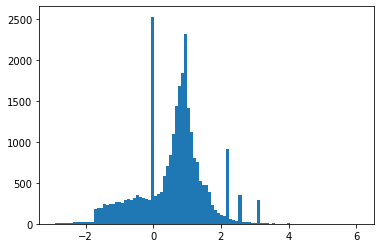

In [12]:
for features,label in packed_ds.batch(1000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

To keep this tutorial relatively short use just the first 1000 samples for validation, and the next 10 000 for training:

In [13]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

The `Dataset.skip` and `Dataset.take` methods make this easy.

At the same time, use the `Dataset.cache` method to ensure that the loader doesn't need to re-read the data from the file on each epoch:

In [14]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [15]:
train_ds

<CacheDataset shapes: ((28,), ()), types: (tf.float32, tf.float32)>

These datasets return individual examples. Use the `.batch` method to create batches of an appropriate size for training. Before batching also remember to `.shuffle` and `.repeat` the training set.

In [16]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

## Demonstrate overfitting

The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

Start with a simple model using only `layers.Dense` as a baseline, then create larger versions, and compare them.

### Training procedure

Many models train better if you gradually reduce the learning rate during training. Use `optimizers.schedules` to reduce the learning rate over time:

In [17]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

The code above sets a `schedules.InverseTimeDecay` to hyperbolically decrease the learning rate to 1/2 of the base rate at 1000 epochs, 1/3 at 2000 epochs and so on.

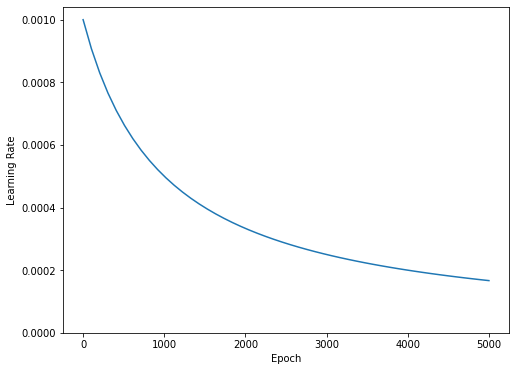

In [18]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


Each model in this tutorial will use the same training configuration. So set these up in a reusable way, starting with the list of callbacks.

The training for this tutorial runs for many short epochs. To reduce the logging noise use the `tfdocs.EpochDots` which simply prints a `.` for each epoch, and a full set of metrics every 100 epochs.

Next include `callbacks.EarlyStopping` to avoid long and unnecessary training times. Note that this callback is set to monitor the `val_binary_crossentropy`, not the `val_loss`. This difference will be important later.

Use `callbacks.TensorBoard` to generate TensorBoard logs for the training.


In [19]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

Similarly each model will use the same `Model.compile` and `Model.fit` settings:

In [20]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### Tiny model

Start by training a model:

In [21]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [22]:
size_histories = {}

In [23]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5077,  binary_crossentropy:0.7484,  loss:0.7484,  val_accuracy:0.4880,  val_binary_crossentropy:0.7221,  val_loss:0.7221,  
...

...

...

...

...

...

...

...

...

...

...

...

...

..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 100, accuracy:0.5955,  binary_crossentropy:0.6263,  loss:0.6263,  val_accuracy:0.5690,  val_binary_crossentropy:0.6282,  val_loss:0.6282,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 200, accuracy:0.6208,  binary_crossentropy:0.6127,  loss:0.6127,  val_accuracy:0.6070,  val_binary_crossentropy:0.6128,  val_loss:0.6128,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 300, accuracy:0.6411,  binary_crossentropy:0.6021,  loss:0.6021,  val_accuracy:0.6110,  val_binary_crossentropy:0.6058,  val_loss:0.6058,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 400, accuracy:0.6540,  binary_crossentropy:0.5933,  loss:0.5933,  val_accuracy:0.6310,  val_binary_crossentropy:0.5971,  val_loss:0.5971,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 500, accuracy:0.6621,  binary_crossentropy:0.5884,  loss:0.5884,  val_accuracy:0.6310,  val_binary_crossentropy:0.5919,  val_loss:0.5919,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 600, accuracy:0.6648,  binary_crossentropy:0.5838,  loss:0.5838,  val_accuracy:0.6440,  val_binary_crossentropy:0.5891,  val_loss:0.5891,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 700, accuracy:0.6688,  binary_crossentropy:0.5806,  loss:0.5806,  val_accuracy:0.6470,  val_binary_crossentropy:0.5896,  val_loss:0.5896,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 800, accuracy:0.6744,  binary_crossentropy:0.5782,  loss:0.5782,  val_accuracy:0.6260,  val_binary_crossentropy:0.5928,  val_loss:0.5928,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 900, accuracy:0.6760,  binary_crossentropy:0.5760,  loss:0.5760,  val_accuracy:0.6330,  val_binary_crossentropy:0.5917,  val_loss:0.5917,  
..

...

...

...

...

...

..

Now check how the model did:

(0.5, 0.7)

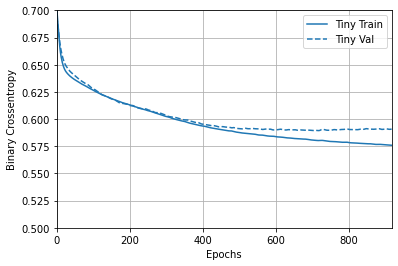

In [24]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

### Small model

To see if you can beat the performance of the small model, progressively train some larger models.

Try two hidden layers with 16 units each:

In [25]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [26]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.4973,  binary_crossentropy:0.7537,  loss:0.7537,  val_accuracy:0.5010,  val_binary_crossentropy:0.7135,  val_loss:0.7135,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6188,  binary_crossentropy:0.6143,  loss:0.6143,  val_accuracy:0.6090,  val_binary_crossentropy:0.6138,  val_loss:0.6138,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6533,  binary_crossentropy:0.5964,  loss:0.5964,  val_accuracy:0.6250,  val_binary_crossentropy:0.6021,  val_loss:0.6021,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 300, accuracy:0.6689,  binary_crossentropy:0.5832,  loss:0.5832,  val_accuracy:0.6510,  val_binary_crossentropy:0.5960,  val_loss:0.5960,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 400, accuracy:0.6770,  binary_crossentropy:0.5760,  loss:0.5760,  val_accuracy:0.6590,  val_binary_crossentropy:0.5906,  val_loss:0.5906,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 500, accuracy:0.6866,  binary_crossentropy:0.5692,  loss:0.5692,  val_accuracy:0.6690,  val_binary_crossentropy:0.5912,  val_loss:0.5912,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 600, accuracy:0.6877,  binary_crossentropy:0.5649,  loss:0.5649,  val_accuracy:0.6660,  val_binary_crossentropy:0.5915,  val_loss:0.5915,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 700, accuracy:0.6940,  binary_crossentropy:0.5597,  loss:0.5597,  val_accuracy:0.6680,  val_binary_crossentropy:0.5890,  val_loss:0.5890,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 800, accuracy:0.7018,  binary_crossentropy:0.5549,  loss:0.5549,  val_accuracy:0.6710,  val_binary_crossentropy:0.5892,  val_loss:0.5892,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 900, accuracy:0.7003,  binary_crossentropy:0.5522,  loss:0.5522,  val_accuracy:0.6730,  val_binary_crossentropy:0.5881,  val_loss:0.5881,  
...

...

...

.

### Medium model

Now try 3 hidden layers with 64 units each:

In [27]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

And train the model using the same data:

In [28]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5013,  binary_crossentropy:0.6912,  loss:0.6912,  val_accuracy:0.4840,  val_binary_crossentropy:0.6768,  val_loss:0.6768,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.7119,  binary_crossentropy:0.5280,  loss:0.5280,  val_accuracy:0.6430,  val_binary_crossentropy:0.6205,  val_loss:0.6205,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.7907,  binary_crossentropy:0.4234,  loss:0.4234,  val_accuracy:0.6620,  val_binary_crossentropy:0.7062,  val_loss:0.7062,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.

### Large model

As an exercise, you can create an even larger model, and see how quickly it begins overfitting.  Next, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [29]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1)
])

And, again, train the model using the same data:

In [30]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               14848     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5079,  binary_crossentropy:0.8163,  loss:0.8163,  val_accuracy:0.5590,  val_binary_crossentropy:0.6801,  val_loss:0.6801,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:1.0000,  binary_crossentropy:0.0022,  loss:0.0022,  val_accuracy:0.6540,  val_binary_crossentropy:1.7904,  val_loss:1.7904,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:1.0000,  binary_crossentropy:0.0001,  loss:0.0001,  val_accuracy:0.6590,  val_binary_crossentropy:2.4375,  val_loss:2.4375,  
.

...

...

...

...

...

...

...

### Plot the training and validation losses

The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model).

While building a larger model gives it more power, if this power is not constrained somehow it can easily overfit to the training set.

In this example, typically, only the `"Tiny"` model manages to avoid overfitting altogether, and each of the larger models overfit the data more quickly. This becomes so severe for the `"large"` model that you need to switch the plot to a log-scale to really see what's happening.

This is apparent if you plot and compare the validation metrics to the training metrics.

* It's normal for there to be a small difference.
* If both metrics are moving in the same direction, everything is fine.
* If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
* If the validation metric is going in the wrong direction, the model is clearly overfitting.

Text(0.5, 0, 'Epochs [Log Scale]')

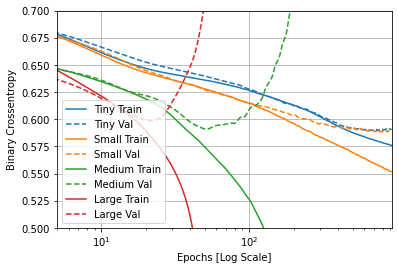

In [31]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

Note: All the above training runs used the `callbacks.EarlyStopping` to end the training once it was clear the model was not making progress.

### View in TensorBoard

These models all wrote TensorBoard logs during training.

Open an embedded  TensorBoard viewer inside a notebook:

In [0]:
#docs_infra: no_execute
%tensorboard --logdir {logdir}/sizes

You can view the [results of a previous run](https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorBoard.dev](https://tensorboard.dev/).

TensorBoard.dev is a managed experience for hosting, tracking, and sharing ML experiments with everyone.

It's also included in an `<iframe>` for convenience:

In [32]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

If you want to share TensorBoard results you can upload the logs to [TensorBoard.dev](https://tensorboard.dev/) by copying the following into a code-cell.

Note: This step requires a Google account.

```
!tensorboard dev upload --logdir  {logdir}/sizes
```

Caution: This command does not terminate. It's designed to continuously upload the results of long-running experiments. Once your data is uploaded you need to stop it using the "interrupt execution" option in your notebook tool.

## Strategies to prevent overfitting

Before getting into the content of this section copy the training logs from the `"Tiny"` model above, to use as a baseline for comparison.

In [33]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/tmp/tmpqdi_f3ae/tensorboard_logs/regularizers/Tiny')

In [34]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### Add weight regularization


You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

* [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization), where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization), where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization pushes weights towards exactly zero encouraging a sparse model. L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights. one reason why L2 is more common.

In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

In [35]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5125,  binary_crossentropy:0.8513,  loss:2.3730,  val_accuracy:0.5660,  val_binary_crossentropy:0.6843,  val_loss:2.1367,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6561,  binary_crossentropy:0.5974,  loss:0.6213,  val_accuracy:0.6520,  val_binary_crossentropy:0.5857,  val_loss:0.6095,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6729,  binary_crossentropy:0.5813,  loss:0.6044,  val_accuracy:0.6640,  val_binary_crossentropy:0.5836,  val_loss:0.6066,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 300, accuracy:0.6800,  binary_crossentropy:0.5721,  loss:0.5955,  val_accuracy:0.6710,  val_binary_crossentropy:0.5964,  val_loss:0.6196,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 400, accuracy:0.6843,  binary_crossentropy:0.5695,  loss:0.5923,  val_accuracy:0.6520,  val_binary_crossentropy:0.5991,  val_loss:0.6218,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value**2` to the total **loss** of the network.

That is why we're monitoring the `binary_crossentropy` directly. Because it doesn't have this regularization component mixed in.

So, that same `"Large"` model with an `L2` regularization penalty performs much better:


(0.5, 0.7)

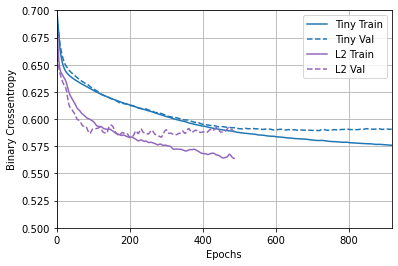

In [36]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

As you can see, the `"L2"` regularized model is now much more competitive with the the `"Tiny"` model. This `"L2"` model is also much more resistant to overfitting than the `"Large"` model it was based on despite having the same number of parameters.

#### More info

There are two important things to note about this sort of regularization.

**First:** if you are writing your own training loop, then you need to be sure to ask the model for its regularization losses.

In [37]:
result = l2_model(features)
regularization_loss=tf.add_n(l2_model.losses)

**Second:** This implementation works by adding the weight penalties to the model's loss, and then applying a standard optimization procedure after that.

There is a second approach that instead only runs the optimizer on the raw loss, and then while applying the calculated step the optimizer also applies some weight decay. This "Decoupled Weight Decay" is seen in optimizers like `optimizers.FTRL` and `optimizers.AdamW`.

### Add dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5,
1.3, 0, 1.1].

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In `tf.keras` you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

Let's add two Dropout layers in our network to see how well they do at reducing overfitting:

In [38]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              


Epoch: 0, accuracy:0.5003,  binary_crossentropy:0.8094,  loss:0.8094,  val_accuracy:0.4990,  val_binary_crossentropy:0.6744,  val_loss:0.6744,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6645,  binary_crossentropy:0.5914,  loss:0.5914,  val_accuracy:0.6890,  val_binary_crossentropy:0.5733,  val_loss:0.5733,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6806,  binary_crossentropy:0.5587,  loss:0.5587,  val_accuracy:0.6880,  val_binary_crossentropy:0.5805,  val_loss:0.5805,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 300, accuracy:0.7258,  binary_crossentropy:0.5049,  loss:0.5049,  val_accuracy:0.6870,  val_binary_crossentropy:0.5944,  val_loss:0.5944,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..

(0.5, 0.7)

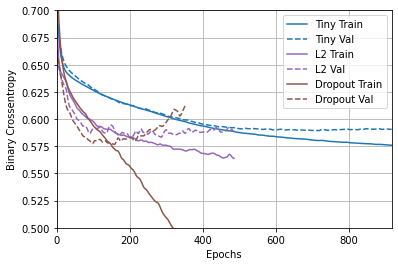

In [39]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

It's clear from this plot that both of these regularization approaches improve the behavior of the `"Large"` model. But this still doesn't beat even the `"Tiny"` baseline.

Next try them both, together, and see if that does better.

### Combined L2 + dropout

In [40]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)              


Epoch: 0, accuracy:0.5020,  binary_crossentropy:0.8000,  loss:0.9581,  val_accuracy:0.5490,  val_binary_crossentropy:0.6777,  val_loss:0.8350,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6481,  binary_crossentropy:0.6058,  loss:0.6343,  val_accuracy:0.6680,  val_binary_crossentropy:0.5861,  val_loss:0.6144,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6594,  binary_crossentropy:0.5916,  loss:0.6169,  val_accuracy:0.6630,  val_binary_crossentropy:0.5751,  val_loss:0.6004,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 300, accuracy:0.6694,  binary_crossentropy:0.5826,  loss:0.6101,  val_accuracy:0.6960,  val_binary_crossentropy:0.5586,  val_loss:0.5860,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 400, accuracy:0.6770,  binary_crossentropy:0.5767,  loss:0.6057,  val_accuracy:0.6880,  val_binary_crossentropy:0.5572,  val_loss:0.5862,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 500, accuracy:0.6845,  binary_crossentropy:0.5698,  loss:0.6015,  val_accuracy:0.6890,  val_binary_crossentropy:0.5540,  val_loss:0.5857,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..

..

..

..

..

..

..

..

..

..

..

..

..

.
Epoch: 600, accuracy:0.6848,  binary_crossentropy:0.5645,  loss:0.5984,  val_accuracy:0.6640,  val_binary_crossentropy:0.5589,  val_loss:0.5928,  
.

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

...

..

..

..

..

..

..

..

..

..

..

..

...

..

...

...

...

...

...

...

...

...

...

..
Epoch: 700, accuracy:0.6912,  binary_crossentropy:0.5589,  loss:0.5938,  val_accuracy:0.7050,  val_binary_crossentropy:0.5398,  val_loss:0.5746,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 800, accuracy:0.6916,  binary_crossentropy:0.5573,  loss:0.5933,  val_accuracy:0.6840,  val_binary_crossentropy:0.5478,  val_loss:0.5839,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 900, accuracy:0.6874,  binary_crossentropy:0.5575,  loss:0.5944,  val_accuracy:0.7170,  val_binary_crossentropy:0.5456,  val_loss:0.5826,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 1000, accuracy:0.6961,  binary_crossentropy:0.5530,  loss:0.5912,  val_accuracy:0.7030,  val_binary_crossentropy:0.5488,  val_loss:0.5871,  
.

...

...

...

...

...

...

...

...

...

...

...

(0.5, 0.7)

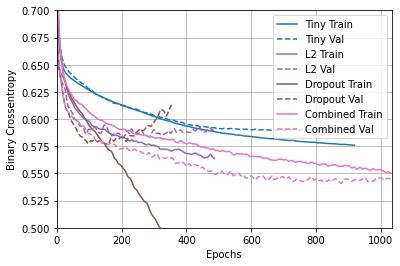

In [41]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

This model with the `"Combined"` regularization is obviously the best one so far.

### View in TensorBoard

These models also recorded TensorBoard logs.

To open an embedded  tensorboard viewer inside a notebook, copy the following into a code-cell:

```
%tensorboard --logdir {logdir}/regularizers
```

You can view the [results of a previous run](https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorDoard.dev](https://tensorboard.dev/).

It's also included in an `<iframe>` for convenience:

In [42]:
display.IFrame(
    src="https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97",
    width = "100%",
    height="800px")


This was uploaded with:

```
!tensorboard dev upload --logdir  {logdir}/regularizers
```

## Conclusions

To recap: here are the most common ways to prevent overfitting in neural networks:

* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

Two important approaches not covered in this guide are:

* data-augmentation
* batch normalization

Remember that each method can help on its own, but often combining them can be even more effective.